# DATA PREPARATION/COLLECTION,CLEANING & VISUALIZATION

## Data Preparation (Instaling, Cleaning, Concating)

#  

The CESM2 data for temprature, surface wind, and precipitation is downloaded from [Climate Data Gateway
at NCAR under Earth System Grid](https://www.earthsystemgrid.org/dataset/ucar.cgd.cesm2le.atm.proc.monthly_ave.html). First, the steps to retieve the data is access thoguh this free website. The only requiremnts is you sign up and inform the purpose of the data usage. However, the CESM2 is made as an open source for everyone to help increase assecibility to weather data and predictions. The data is download in a python script from Group 1231 from Ensemble Member 1-10 for each of the three variables.


The next steps are to read the following packages in order to read the data. This means that running the pyhton script on the jupyter notebook is the first step to open the data, which puts the data in one's work space. A function is created to read each file in the pycript and put that specific ensemble member into a saved folder witht he variable name. This step is repeated on a for loop based on the length of the ensemble members that is needed to be analyzed. It is worth noting that reading the dataset under a py script rearaged the time components so the usage of decode_cf and cf_units.num2date is used in order to change the time to a dataframe for each ensemble member before being exported as a netcdf. Additonally, the data is croped from 30 deg South to 30 deg North, because tropics is the region of interest for the study, which also contains oceanic and their accoacited pacific islands.


Then, the data is read in again under a function, which purpose is to concatenate all the ensemble member files and apply chunking methods for the dataset size is very big. Chunking the data helps reading and applying methods faster, however, one needs to load the data in order to show figures. While the CESM2 with post processing from NCAR has little to none missing, dublicate, or incorrect values. Thus in order to make sure nan are not being accounted then the usage of skipna in xarray is used, which skip missing values (as marked by NaN).


In [ ]:
# Install packages that are not present
# pip install cftime

!pip install cf-units

!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.1/518.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.9 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.2-py3-none-any.whl size=140931 sha256=fe00d99b8b55cd4f27151a95fa9b7207f09d22de992e24449e97edb474fa87bb
  Stored in directory: /root/.cache/pip/wheels/79/20/ec/30bf7dabc29319ccc0d0c96f910a640513a3c81faa960fed43
Successfully built antlr4-python3-runtime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.0 MB/s eta 0:00:00


In [ ]:
#Import Packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import xarray as xr
import scipy as sp
from scipy.stats import pearsonr
from scipy import signal
import os
import scipy as sp
import cartopy as cart
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)
from datetime import datetime, date, time, timedelta
import calendar
import math
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import shapely
from shapely.geometry import Point, Polygon
import natsort
from natsort import natsorted
import cftime
import cf_units
import matplotlib.patches as mpatches
import matplotlib.colors
from matplotlib.colors import SymLogNorm
import matplotlib.transforms as mtransforms
import seaborn as sns


# import xarray as xr
# import natsort
# from natsort import natsorted
# import os
# import shutil
# import subprocess

### Read the Data

In [ ]:
#Make folder for the data
#Read py script and put into a folder
def folder_data_var(var_name):
  new_folder_name = 'NCAR_CESM2_1231_' + str(var_name)
  os.makedirs(new_folder_name)


In [ ]:
#Make folder for variables
for var in ['TS', 'PRECT', 'WSPDSRFAV']:
  folder_data_var(var)

In [ ]:
#Keep colab occupied, re-run every few minutes
print("Running...")

Running...


## Open the Python Script of all the Data

In [ ]:
#Run the data

#Read in the Temperature
#TS
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.TS-redownload_1.py

#Read in the Precipitation
#PRECT
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.PRECT-redownload_1.py

#Read in the Wind
#WSPDSRFAV (Wind)
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV-redownload.py
!python python-ucar.cgd.cesm2le.atm.proc.monthly_ave.WSPDSRFAV-redownload_1.py

In [ ]:
#Read one Ensemble Member and put into file
def read_concat_1EM(EM_num, Var_or_int):
  #Ensemble Member for Data
  VOIE1_1= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.197001-197912.nc', decode_times=False)
  #Read the time component correctly
  time_units_1 = VOIE1_1['time'].attrs['units']
  calendar_1 = VOIE1_1['time'].attrs['calendar']
  decoded_time_1 = cf_units.num2date(VOIE1_1['time'], time_units_1, calendar=calendar_1)
  # Update time variable with decoded values
  VOIE1_1['time'] = xr.DataArray(decoded_time_1, dims='time')
  # Now you can use decode_times=True when opening the dataset
  VOIE1_1 = xr.decode_cf(VOIE1_1)
  VOIE1_1['time'] = VOIE1_1['time'].values.astype('datetime64[M]')


  VOIE1_2= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.198001-198912.nc', decode_times=False)
  time_units_2 = VOIE1_2['time'].attrs['units']
  calendar_2 = VOIE1_2['time'].attrs['calendar']
  decoded_time_2 = cf_units.num2date(VOIE1_2['time'], time_units_2, calendar=calendar_2)
  VOIE1_2['time'] = xr.DataArray(decoded_time_2, dims='time')
  VOIE1_2 = xr.decode_cf(VOIE1_2)
  VOIE1_2['time'] = VOIE1_2['time'].values.astype('datetime64[M]')

  VOIE1_3= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.199001-199912.nc', decode_times=False)
  time_units_3 = VOIE1_3['time'].attrs['units']
  calendar_3 = VOIE1_3['time'].attrs['calendar']
  decoded_time_3 = cf_units.num2date(VOIE1_3['time'], time_units_3, calendar=calendar_3)
  VOIE1_3['time'] = xr.DataArray(decoded_time_3, dims='time')
  VOIE1_3 = xr.decode_cf(VOIE1_3)
  VOIE1_3['time'] = VOIE1_3['time'].values.astype('datetime64[M]')

  VOIE1_4= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.200001-200912.nc', decode_times=False)
  time_units_4 = VOIE1_4['time'].attrs['units']
  calendar_4 = VOIE1_4['time'].attrs['calendar']
  decoded_time_4 = cf_units.num2date(VOIE1_4['time'], time_units_4, calendar=calendar_4)
  VOIE1_4['time'] = xr.DataArray(decoded_time_4, dims='time')
  VOIE1_4 = xr.decode_cf(VOIE1_4)
  VOIE1_4['time'] = VOIE1_4['time'].values.astype('datetime64[M]')

  VOIE1_5= xr.open_dataset('b.e21.BHISTcmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.201001-201412.nc', decode_times=False)
  time_units_5 = VOIE1_5['time'].attrs['units']
  calendar_5 = VOIE1_5['time'].attrs['calendar']
  decoded_time_5 = cf_units.num2date(VOIE1_5['time'], time_units_5, calendar=calendar_5)
  VOIE1_5['time'] = xr.DataArray(decoded_time_5, dims='time')
  VOIE1_5 = xr.decode_cf(VOIE1_5)
  VOIE1_5['time'] = VOIE1_5['time'].values.astype('datetime64[M]')

  VOIE1_6= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.202501-203412.nc', decode_times=False)
  time_units_6 = VOIE1_6['time'].attrs['units']
  calendar_6 = VOIE1_6['time'].attrs['calendar']
  decoded_time_6 = cf_units.num2date(VOIE1_6['time'], time_units_6, calendar=calendar_6)
  VOIE1_6['time'] = xr.DataArray(decoded_time_6, dims='time')
  VOIE1_6 = xr.decode_cf(VOIE1_6)
  VOIE1_6['time'] = VOIE1_6['time'].values.astype('datetime64[M]')

  VOIE1_7= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.203501-204412.nc', decode_times=False)
  time_units_7 = VOIE1_7['time'].attrs['units']
  calendar_7 = VOIE1_7['time'].attrs['calendar']
  decoded_time_7 = cf_units.num2date(VOIE1_7['time'], time_units_7, calendar=calendar_7)
  VOIE1_7['time'] = xr.DataArray(decoded_time_7, dims='time')
  VOIE1_7 = xr.decode_cf(VOIE1_7)
  VOIE1_7['time'] = VOIE1_7['time'].values.astype('datetime64[M]')

  VOIE1_8= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.204501-205412.nc', decode_times=False)
  time_units_8 = VOIE1_8['time'].attrs['units']
  calendar_8 = VOIE1_8['time'].attrs['calendar']
  decoded_time_8 = cf_units.num2date(VOIE1_8['time'], time_units_8, calendar=calendar_8)
  VOIE1_8['time'] = xr.DataArray(decoded_time_8, dims='time')
  VOIE1_8 = xr.decode_cf(VOIE1_8)
  VOIE1_8['time'] = VOIE1_8['time'].values.astype('datetime64[M]')

  VOIE1_9= xr.open_dataset('b.e21.BSSP370cmip6.f09_g17.LE2-1231.'+str(EM_num)+'.cam.h0.'+str(Var_or_int)+'.205501-206412.nc', decode_times=False)
  time_units_9 = VOIE1_9['time'].attrs['units']
  calendar_9 = VOIE1_9['time'].attrs['calendar']
  decoded_time_9 = cf_units.num2date(VOIE1_9['time'], time_units_9, calendar=calendar_9)
  VOIE1_9['time'] = xr.DataArray(decoded_time_9, dims='time')
  VOIE1_9 = xr.decode_cf(VOIE1_9)
  VOIE1_9['time'] = VOIE1_9['time'].values.astype('datetime64[M]')


  # Crop Data base on 30 deg S and 30 deg N
  VOIE1_1 = VOIE1_1[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_2 = VOIE1_2[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_3 = VOIE1_3[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_4 = VOIE1_4[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_5 = VOIE1_5[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_6 = VOIE1_6[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_7 = VOIE1_7[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_8 = VOIE1_8[str(Var_or_int)].loc[dict(lat=slice(-30,30))]
  VOIE1_9 = VOIE1_9[str(Var_or_int)].loc[dict(lat=slice(-30,30))]


  #Put data together on the same array
  VOIE1 = xr.concat([VOIE1_1,VOIE1_2,VOIE1_3,VOIE1_4,VOIE1_5,VOIE1_6,VOIE1_7,VOIE1_8,VOIE1_9],dim='time')


  #Save data into a netcdf and put into the folder
  VOIE1.to_netcdf('NCAR_CESM2_1231_'+str(Var_or_int)+'/'+str(Var_or_int)+'_1231_'+str(EM_num)+'_MON.nc',format="NETCDF3_64BIT")
  return VOIE1


### Concat all the Ensemble Members into one

In [ ]:
#Read All Ensemble members into one array
def concat_xr_from_directory(file_dir_list,varname,varname_var,chunks={'time':365*10}):
    print(f"Concatenating Data for Variable: {varname}")
    # Generate a list of files from the directory
    print("="*79)
    files = []
    for file_dir in file_dir_list:
        files += [file_dir + x for x in os.listdir(file_dir) if varname in x]
    files = natsorted(files)
    print(files)

    # Read in individual files
    # Empty dict to hold data
    dset_dict = {}
    for file in files:
        # Get ens name from filename
        ens_name = file.split("/")[-1][len(varname) + 6:-4].split(".")[0]
        # Read in data from this ens member and rename field
        dset_tmp = xr.open_dataset(
            file,
            chunks   = chunks,
            # parallel = True
        )
        dset_save = xr.Dataset()
        dset_save[varname_var] = dset_tmp[f"{varname_var}"]

        # Save to the dictionary
        dset_dict[ens_name] = dset_save

    # Concat files
    dset = xr.concat(dset_dict.values(),dim="Ensemble")

    return dset

In [ ]:
file_directory_TS = ["NCAR_CESM2_1231_TS/"]
file_directory_PRECT = ["NCAR_CESM2_1231_PRECT/"]
file_directory_WSPDSRFAV = ["NCAR_CESM2_1231_WSPDSRFAV/"]

# Applied concating function for all CESM2 Varibales
TS_All_Ensembles_1 = concat_xr_from_directory(file_directory_TS,"TS","TS",chunks={'time':2})
PRECT_All_Ensembles_1 = concat_xr_from_directory(file_directory_PRECT,"PRECT","PRECT",chunks={'time':2})
WSPDSRFAV_All_Ensembles_1 = concat_xr_from_directory(file_directory_WSPDSRFAV,"WSPDSRFAV", "WSPDSRFAV",chunks={'time':2})

#Read the data
Temp_All_Ensembles = TS_All_Ensembles_1.TS-273.15
Prec_All_Ensembles = PRECT_All_Ensembles_1.PRECT*(3600*24)*1000
Wind_All_Ensembles = WSPDSRFAV_All_Ensembles_1.WSPDSRFAV

Concatenating Data for Variable: TS
['NCAR_CESM2_1231_TS/TS_1231_001_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_002_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_003_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_004_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_005_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_006_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_007_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_008_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_009_MON.nc', 'NCAR_CESM2_1231_TS/TS_1231_010_MON.nc']
Concatenating Data for Variable: PRECT
['NCAR_CESM2_1231_PRECT/PRECT_1231_001_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_002_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_003_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_004_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_005_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_006_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_007_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_008_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_009_MON.nc', 'NCAR_CESM2_1231_PRECT/PRECT_1231_010_MON.nc']
Concatenating Data for Variable: WSPDSRFAV


# PLOTTING

- checking quality of data,
- perform data statistics,
- identify attribute types (categorical, numerical etc.),
- have a deeper data understanding (central tendency, dispersion, qq plot),
- data similarity,
- data integration,
- data reduction, (croping based on the tropics)
- normalization,
- transformation etc.

In [ ]:
Temp_All_Ensembles

<xarray.DataArray 'TS' (Ensemble: 10, time: 1020, lat: 64, lon: 288)>
dask.array<sub, shape=(10, 1020, 64, 288), dtype=float32, chunksize=(1, 2, 64, 288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2065-01-01
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -29.69 -28.74 -27.8 -26.86 ... 26.86 27.8 28.74 29.69
Dimensions without coordinates: Ensemble

In [ ]:
Temp_All_Ensembles_spatial_avg

<xarray.DataArray 'TS' (time: 1020)>
dask.array<mean_agg-aggregate, shape=(1020,), dtype=float32, chunksize=(2,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-02-01 1970-03-01 ... 2065-01-01

In [ ]:
# Find the Mean spatial average
Temp_All_Ensembles_spatial_avg = Temp_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)
Prec_All_Ensembles_spatial_avg = Prec_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)
Wind_All_Ensembles_spatial_avg = Wind_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)

# Make the weather data time into pandas
Temp_All_Ensembles_pd = Temp_All_Ensembles_spatial_avg.to_dataframe()
Temp_All_Ensembles_pd = Temp_All_Ensembles_pd.reset_index()

Prec_All_Ensembles_pd = Prec_All_Ensembles_spatial_avg.to_dataframe()
Prec_All_Ensembles_pd = Prec_All_Ensembles_pd.reset_index()

Wind_All_Ensembles_pd = Wind_All_Ensembles_spatial_avg.to_dataframe()
Wind_All_Ensembles_pd = Wind_All_Ensembles_pd.reset_index()



WSPDSRFAV
count  1020.000000
mean      6.234251
std       0.278602
min       5.718763
25%       6.004307
50%       6.192991
75%       6.404333
max       6.904834

In [ ]:
#Data statistics/central tendency
print(Temp_All_Ensembles_pd.describe())
print('=='*75)
print(Prec_All_Ensembles_pd.describe())
print('=='*75)
print(Wind_All_Ensembles_pd.describe())

                TS
count  1020.000000
mean     26.971224
std       0.871391
min      25.169107
25%      26.276667
50%      26.846821
75%      27.654263
max      29.131050
             PRECT
count  1020.000000
mean      3.446866
std       0.088073
min       3.264781
25%       3.371274
50%       3.450958
75%       3.519077
max       3.680644
         WSPDSRFAV
count  1020.000000
mean      6.234251
std       0.278602
min       5.718763
25%       6.004307
50%       6.192991
75%       6.404333
max       6.904834


In [ ]:
#Data dimensions
print(Temp_All_Ensembles_pd.shape)
print('=='*75)
print(Prec_All_Ensembles_pd.shape)
print('=='*75)
print(Wind_All_Ensembles_pd.shape)

(1020, 2)
(1020, 2)
(1020, 2)


In [ ]:
#Checks Data Handeling
print(Temp_All_Ensembles_pd.isnull().sum())
print('=='*75)
print(Prec_All_Ensembles_pd.isnull().sum())
print('=='*75)
print(Wind_All_Ensembles_pd.isnull().sum())

time    0
TS      0
dtype: int64
time     0
PRECT    0
dtype: int64
time         0
WSPDSRFAV    0
dtype: int64


In [ ]:
#Identify attribute types (categorical, numerical etc.)
print(Temp_All_Ensembles_pd.dtypes)
print('=='*75)
print(Prec_All_Ensembles_pd.dtypes)
print('=='*75)
print(Wind_All_Ensembles_pd.dtypes)

time    datetime64[ns]
TS             float32
dtype: object
time     datetime64[ns]
PRECT           float64
dtype: object
time         datetime64[ns]
WSPDSRFAV           float32
dtype: object


In [ ]:
Prec_All_Ensembles_pd_stat

PRECT
count  1020.000000
mean      3.446866
std       0.088073
min       3.264781
25%       3.371274
50%       3.450958
75%       3.519077
max       3.680644

In [ ]:
#Data dispersion
Temp_All_Ensembles_pd_stat = Temp_All_Ensembles_pd.describe()
Temp_All_Ensembles_pd_stat_range = Temp_All_Ensembles_pd_stat.loc['max']-Temp_All_Ensembles_pd_stat.loc['min']
Temp_All_Ensembles_pd_stat_IQR = Temp_All_Ensembles_pd_stat.loc['75%']-Temp_All_Ensembles_pd_stat.loc['25%']
print("Temp Range:" +str(Temp_All_Ensembles_pd_stat_range['TS'])+", Temp IQR:" +str(Temp_All_Ensembles_pd_stat_IQR['TS']))
print('=='*75)
Prec_All_Ensembles_pd_stat = Prec_All_Ensembles_pd.describe()
Prec_All_Ensembles_pd_stat_range = Prec_All_Ensembles_pd_stat.loc['max']-Prec_All_Ensembles_pd_stat.loc['min']
Prec_All_Ensembles_pd_stat_IQR = Prec_All_Ensembles_pd_stat.loc['75%']-Prec_All_Ensembles_pd_stat.loc['25%']
print("Prec Range:" +str(Prec_All_Ensembles_pd_stat_range['PRECT'])+", Prec IQR:" +str(Prec_All_Ensembles_pd_stat_IQR['PRECT']))
print('=='*75)
Wind_All_Ensembles_pd_stat = Wind_All_Ensembles_pd.describe()
Wind_All_Ensembles_pd_stat_range = Wind_All_Ensembles_pd_stat.loc['max']-Wind_All_Ensembles_pd_stat.loc['min']
Wind_All_Ensembles_pd_stat_IQR = Wind_All_Ensembles_pd_stat.loc['75%']-Wind_All_Ensembles_pd_stat.loc['25%']
print("Wind Range:" +str(Wind_All_Ensembles_pd_stat_range['WSPDSRFAV'])+", Wind IQR:" +str(Wind_All_Ensembles_pd_stat_IQR['WSPDSRFAV']))



Temp Range:3.961942672729492, Temp IQR:1.377596378326416
Prec Range:0.4158633125078457, Prec IQR:0.14780299122003582
Wind Range:1.186070442199707, Wind IQR:0.40002596378326416


In [ ]:
print('Correlation between Temp and Precip is ')
print(pearsonr(Temp_All_Ensembles_pd['TS'], Prec_All_Ensembles_pd['PRECT']))
print('=='*75)
print('Correlation between Temp and Wind is ')
print(pearsonr(Temp_All_Ensembles_pd['TS'], Wind_All_Ensembles_pd['WSPDSRFAV']))
print('=='*75)
print('Correlation between Wind and Precip is ')
print(pearsonr(Wind_All_Ensembles_pd['WSPDSRFAV'], Prec_All_Ensembles_pd['PRECT']))
print('=='*75)

Correlation between Temp and Precip is 
PearsonRResult(statistic=0.0037145168492675445, pvalue=0.9056817166912574)
Correlation between Temp and Wind is 
PearsonRResult(statistic=-0.17423005442860698, pvalue=2.1370076103995413e-08)
Correlation between Wind and Precip is 
PearsonRResult(statistic=0.7283642908949963, pvalue=2.45984321622555e-169)


### Data Expolration of Pre-Anaylsis

Histogram

<ipython-input-192-1cd733ebd186>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Temp_month = Temp_All_Ensembles_pd.groupby(Month_ind_temp, sort =False).mean()
<ipython-input-192-1cd733ebd186>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Prec_month = Prec_All_Ensembles_pd.groupby(Month_ind_prec, sort =False).mean()
<ipython-input-192-1cd733ebd186>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Wind_month = W

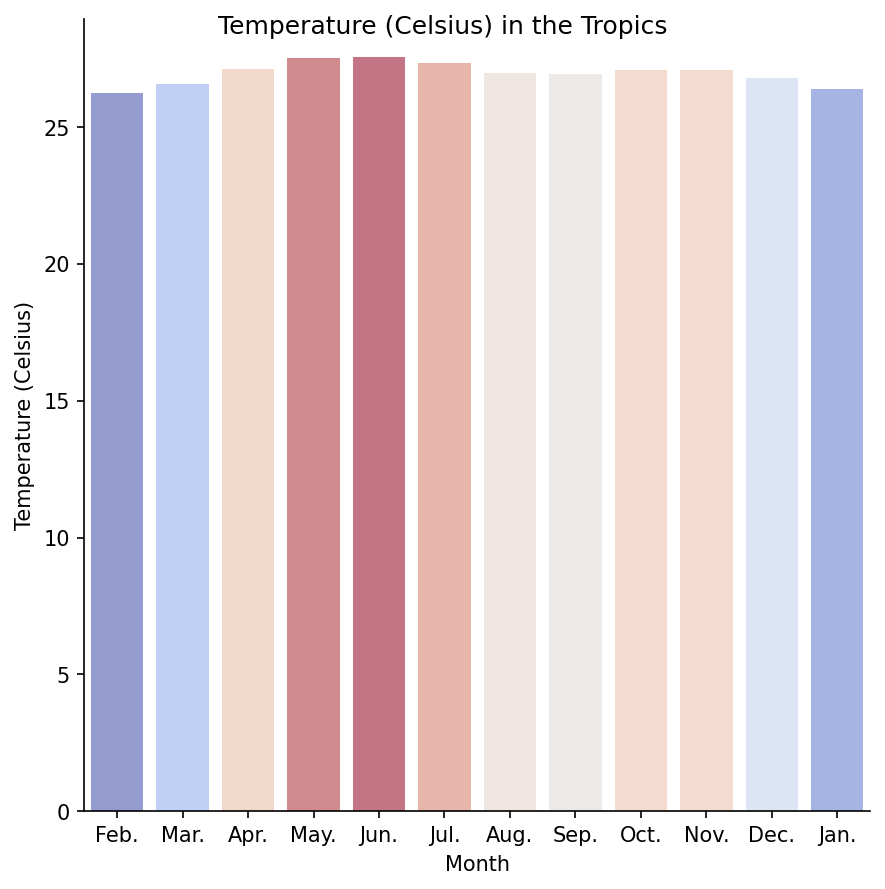

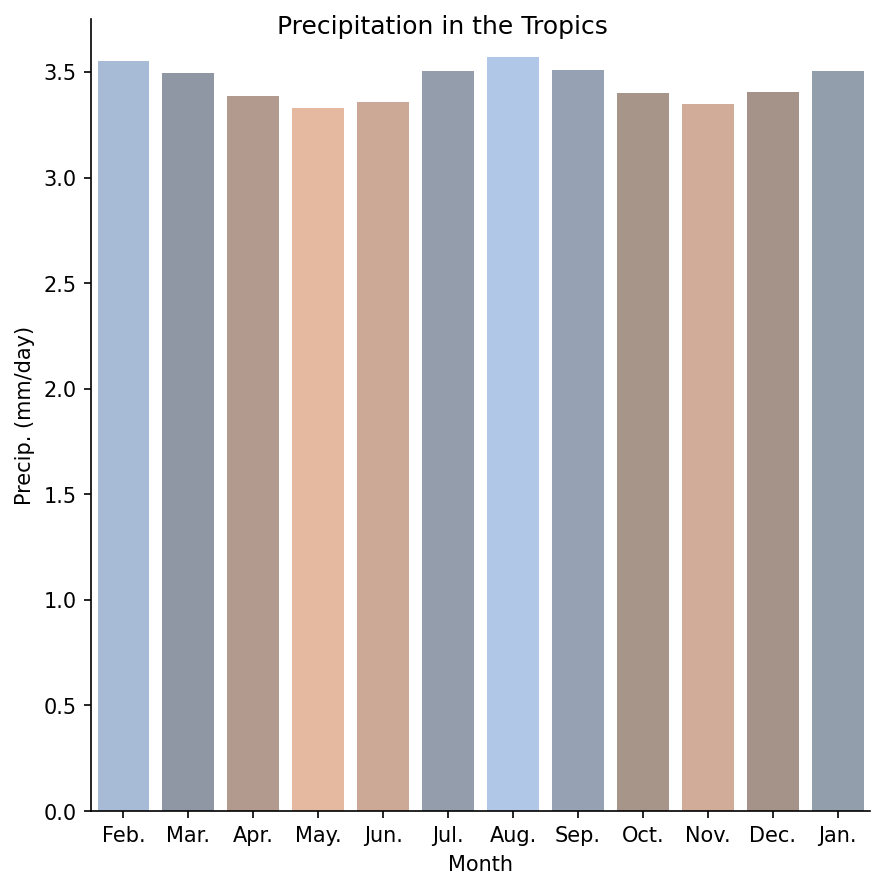

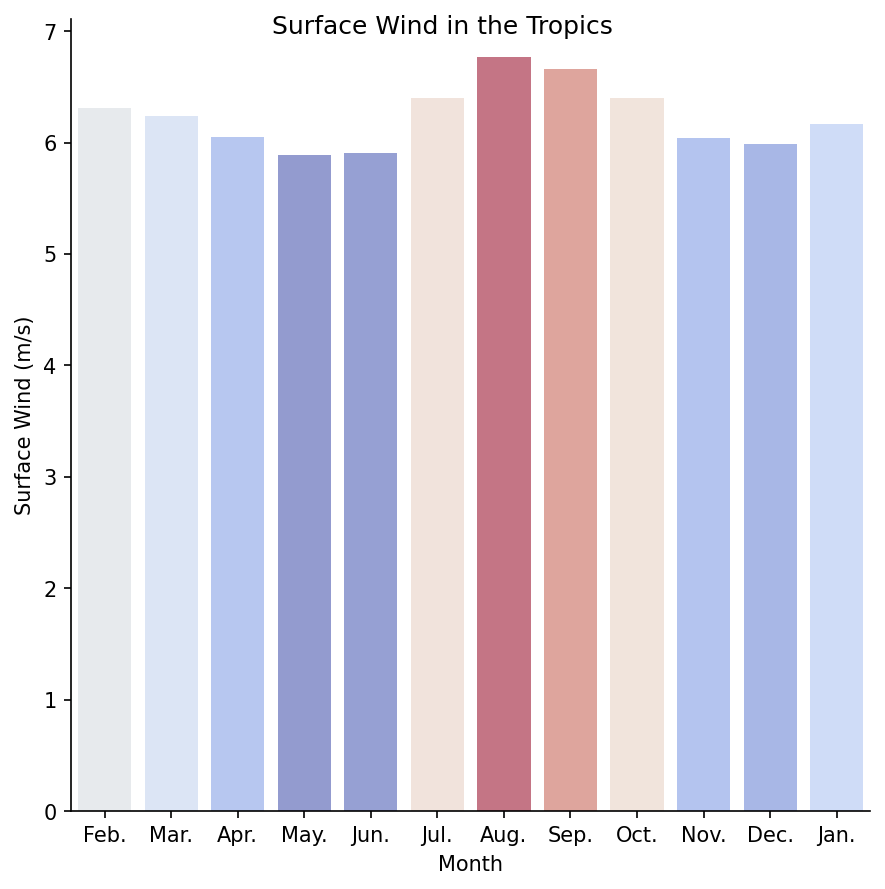

In [ ]:
# Find the Mean spatial average
Temp_All_Ensembles_spatial_avg = Temp_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)
Prec_All_Ensembles_spatial_avg = Prec_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)
Wind_All_Ensembles_spatial_avg = Wind_All_Ensembles.mean(["lat","lon", "Ensemble"],skipna = True)

# Make the weather data time into pandas
Temp_All_Ensembles_pd = Temp_All_Ensembles_spatial_avg.to_dataframe()
Temp_All_Ensembles_pd = Temp_All_Ensembles_pd.reset_index()

Prec_All_Ensembles_pd = Prec_All_Ensembles_spatial_avg.to_dataframe()
Prec_All_Ensembles_pd = Prec_All_Ensembles_pd.reset_index()

Wind_All_Ensembles_pd = Wind_All_Ensembles_spatial_avg.to_dataframe()
Wind_All_Ensembles_pd = Wind_All_Ensembles_pd.reset_index()


#Use for month index
Month_ind_temp = Temp_All_Ensembles_pd['time'].dt.strftime('%b.')
Month_ind_prec = Prec_All_Ensembles_pd['time'].dt.strftime('%b.')
Month_ind_wind = Wind_All_Ensembles_pd['time'].dt.strftime('%b.')

#Group the data by the Month
Temp_month = Temp_All_Ensembles_pd.groupby(Month_ind_temp, sort =False).mean()
Prec_month = Prec_All_Ensembles_pd.groupby(Month_ind_prec, sort =False).mean()
Wind_month = Wind_All_Ensembles_pd.groupby(Month_ind_wind, sort =False).mean()


# Plot the catplot/histogram of temperature, precipitation, and surface wind based on each month

sns.catplot(
    data=Temp_month, kind='bar',
    x='time', y='TS',
    hue='TS',
    palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=.6, height=6, legend=False)
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Month')
plt.suptitle("Temperature (Celsius) in the Tropics")

sns.catplot(
    data=Prec_month, kind='bar',
    x='time', y='PRECT',
    hue='PRECT',
    palette=sns.diverging_palette(30, 250, l=65, center="dark", as_cmap=True),
    alpha=.6, height=6, legend=False)
plt.ylabel('Precip. (mm/day)')
plt.xlabel('Month')
plt.suptitle("Precipitation in the Tropics")

sns.catplot(
    data=Wind_month, kind='bar',
    x='time', y='WSPDSRFAV',
    hue='WSPDSRFAV',
    palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=.6, height=6, legend=False)
plt.ylabel('Surface Wind (m/s)')
plt.xlabel('Month')
plt.suptitle("Surface Wind in the Tropics")
plt.rcParams.update({'font.size': 10})

Hypothesis #1 states there is higher rainfall in the winter months, but have warmer temperatures in the summer months. This hypothesis was correct because there is a reduced amount of precipitation from June to August, and colder temperature from December to Feburary. The histograms also help colorcode the visualization. In the precipitation histogram, there blue represents months with more rainfall amounth, but the brown represents more o the dry months. Additonally, the temperature histogram for max and min shows the colder months in blue and the warmer months in red. One interesting feature is the temperature max and min tend to follow each other. However, the coldest months tend to be the most preceipitaion, which tends to match up with potential Atmospheric River Activities. Steps to go beyond the dataset is to find the year that El Nino, which is a interannual climate varability, is the strongest because these seasons tend to amplify Atmospheric Rivers. Another intersting feature is the July tend to have the warmest temperature max, but August tend to have the warmest temperature min. This can infer that temperature gradients during the month is bigger in July out of all the months. Futhermore, the highest amount of precipitaon tends to be in November in the dataset. The usage of evaulting the spread of the data with each month is the next step to be analyzed.

<ipython-input-184-2c8e4e84702b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Temp_All_Ensembles_pd, x='month', y='TS',


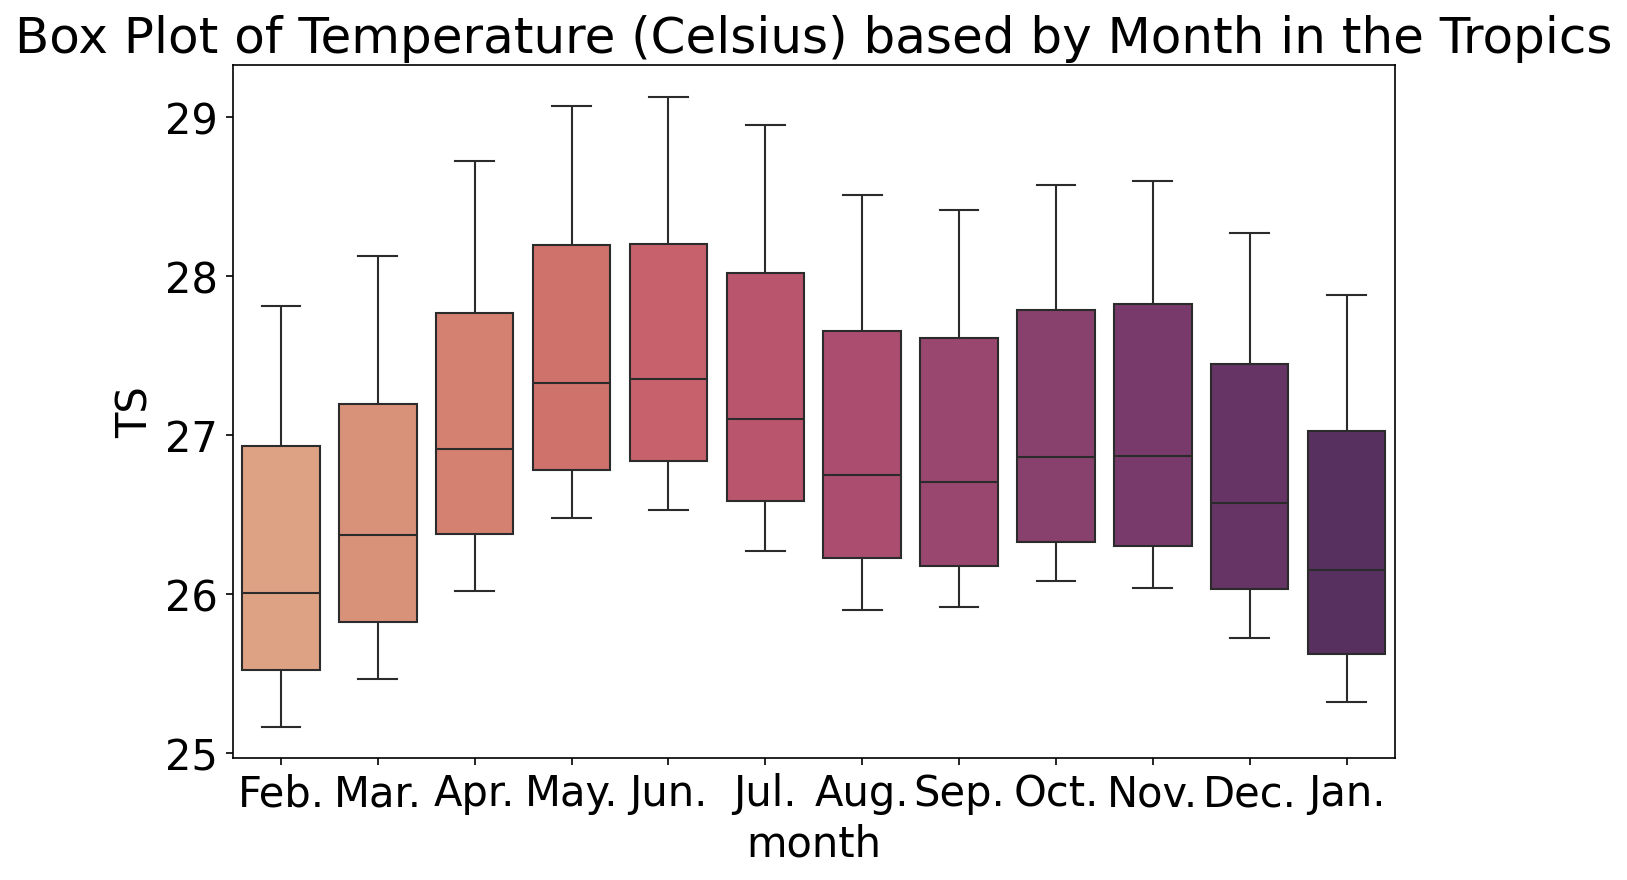

<ipython-input-184-2c8e4e84702b>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',
<ipython-input-184-2c8e4e84702b>:29: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',


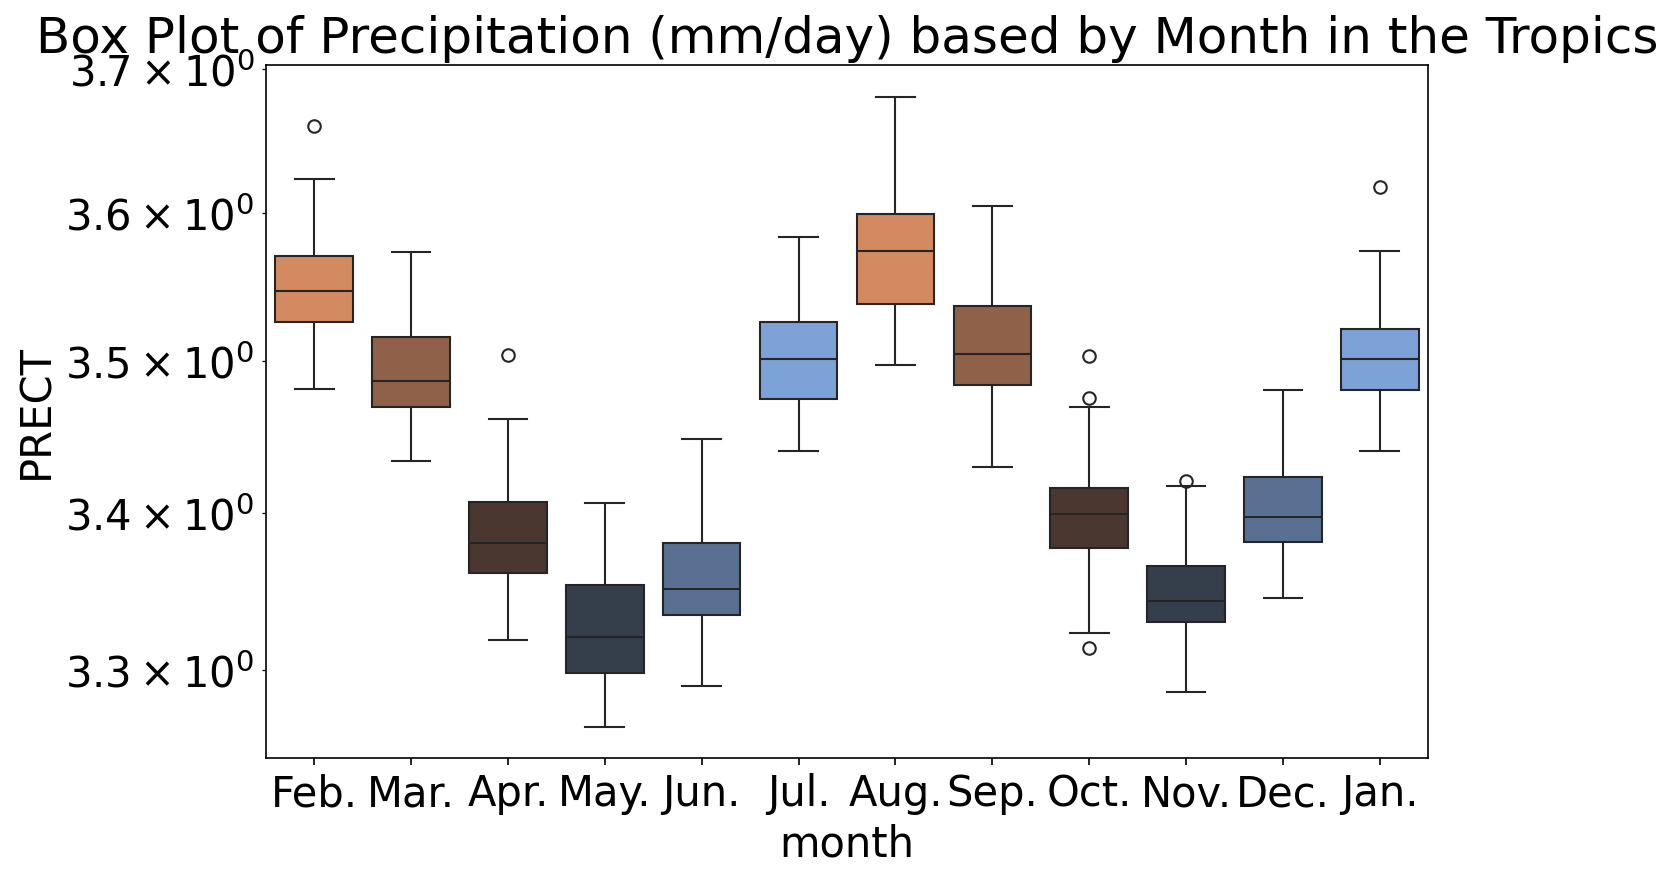

<ipython-input-184-2c8e4e84702b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Wind_All_Ensembles_pd, x='month', y='WSPDSRFAV',


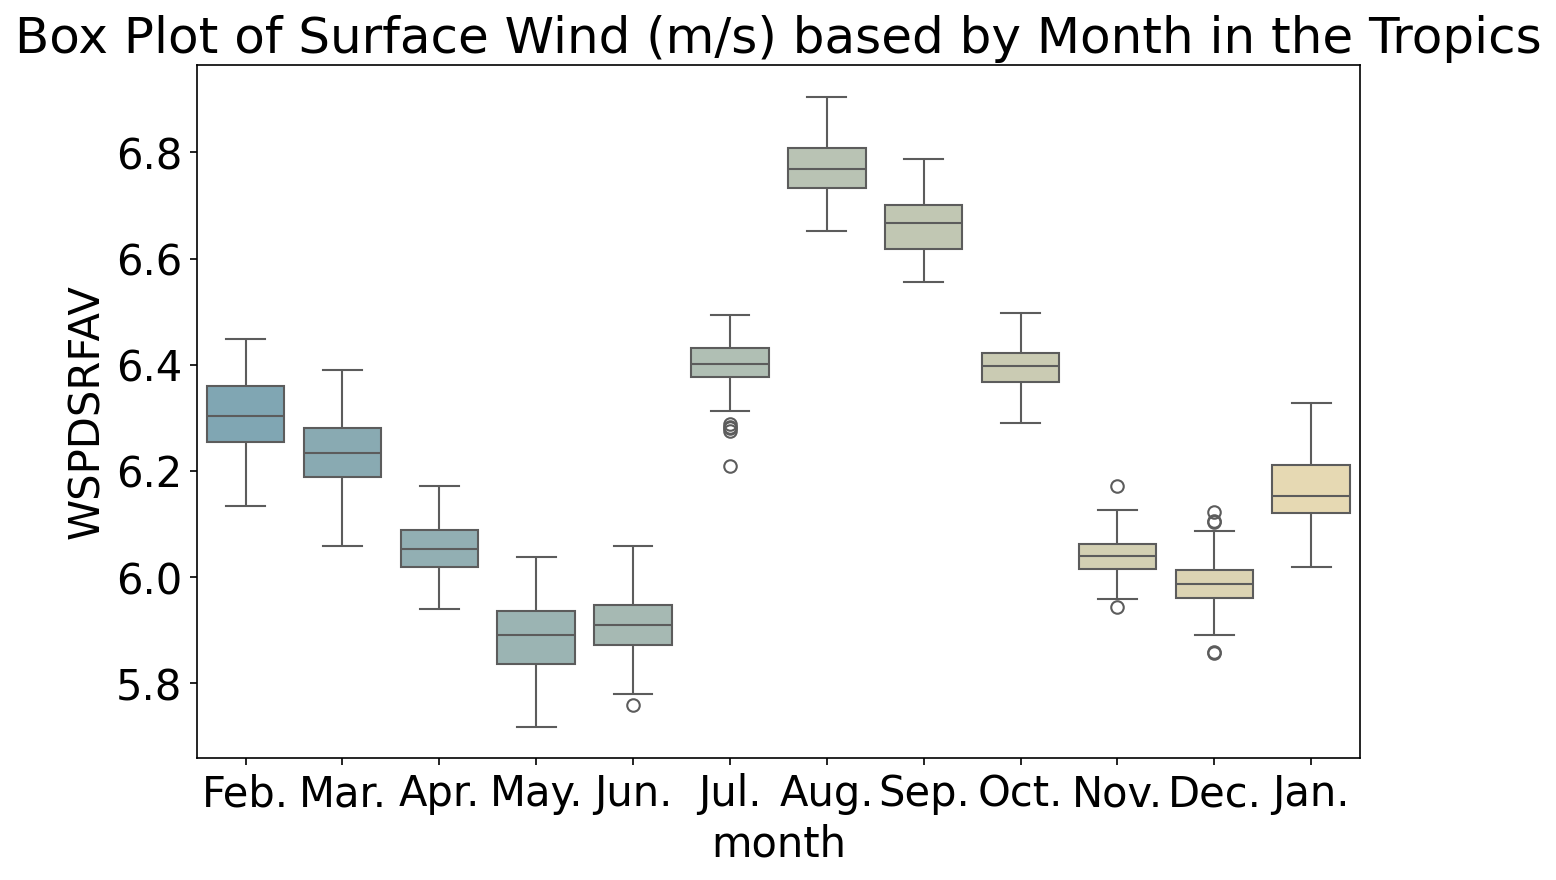

In [ ]:
#Make the categories for the month
Temp_All_Ensembles_pd['month'] = Temp_All_Ensembles_pd['time'].dt.strftime('%b.')
Prec_All_Ensembles_pd['month'] = Prec_All_Ensembles_pd['time'].dt.strftime('%b.')
Wind_All_Ensembles_pd['month'] = Wind_All_Ensembles_pd['time'].dt.strftime('%b.')

#Use for month index
Month_ind_temp = Temp_All_Ensembles_pd['time'].dt.strftime('%b.')
Month_ind_prec = Prec_All_Ensembles_pd['time'].dt.strftime('%b.')
Month_ind_wind = Wind_All_Ensembles_pd['time'].dt.strftime('%b.')


#Order the months
Temp_month_order = Temp_All_Ensembles_pd['month'].unique()
Prec_month_order = Temp_All_Ensembles_pd['month'].unique()
Wind_month_order = Temp_All_Ensembles_pd['month'].unique()



# #Plot the boxplot of precipitation, temp max, and temp min based on each month

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Temp_All_Ensembles_pd, x='month', y='TS',
            palette=sns.color_palette("flare", n_colors=len(Temp_month_order)))
plt.title('Box Plot of Temperature (Celsius) based by Month in the Tropics')
plt.show()

fig= plt.figure(figsize=(10, 6))
sns.boxplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',
            palette=sns.diverging_palette(30, 250, l=65, center="dark"))
fig.get_axes()[0].set_yscale('log')
plt.title('Box Plot of Precipitation (mm/day) based by Month in the Tropics')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=Wind_All_Ensembles_pd, x='month', y='WSPDSRFAV',
            palette=sns.color_palette("blend:#7AB,#EDA", n_colors=len(Wind_month_order)))
plt.title('Box Plot of Surface Wind (m/s) based by Month in the Tropics')
plt.show()


Hypothesis #2 states there is a higher spread of distibution in the winter months rather than the summer months due to colder temperatures and more rainfall. This hypothesis is mostly correct because spread for precipitation and temperature min is greater in the winter months. However, the temperature maximum tend to have the same spread and almost looks uniform with each other. The usage of boxplot was important to show the spead of the distibution in each month to see if different months are more skewed with each other. It is worth noting that there are more outliers in summer months for precipitation and temperature min, but more outliers in winter months for temperature max. This spread can be highly inflruence by each month respective temperature gradients. Moreover, the precipitaion was evaluated by a logrimithic scale to normalize the data since rain amounts can vary greatly for each day, especially in each month. One interesting freature is that July and August doesn't have an apparent boxpot because it is more rare for rain to occur during these summer months. Thus, all points ploted are automattically considered an outlifer since the boxplot is contrasined to be 0. The usage of evaulting the density of the data with each month is the next step to be analyzed.

<ipython-input-185-a2181dabd267>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=Temp_All_Ensembles_pd, x='month', y='TS',


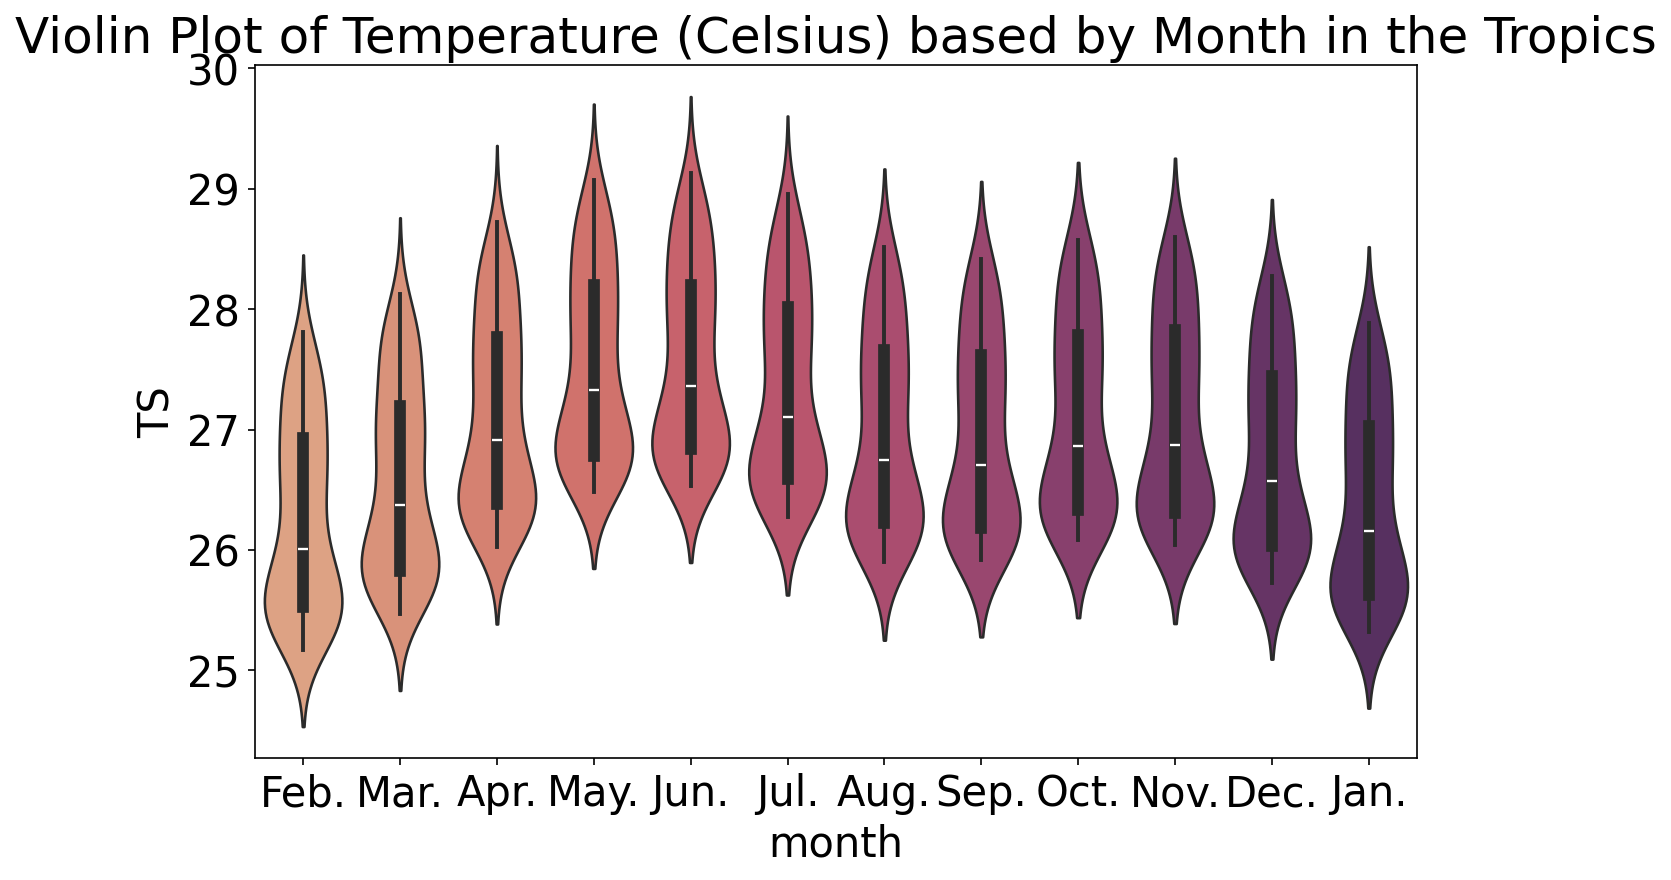

<ipython-input-185-a2181dabd267>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',
<ipython-input-185-a2181dabd267>:11: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',


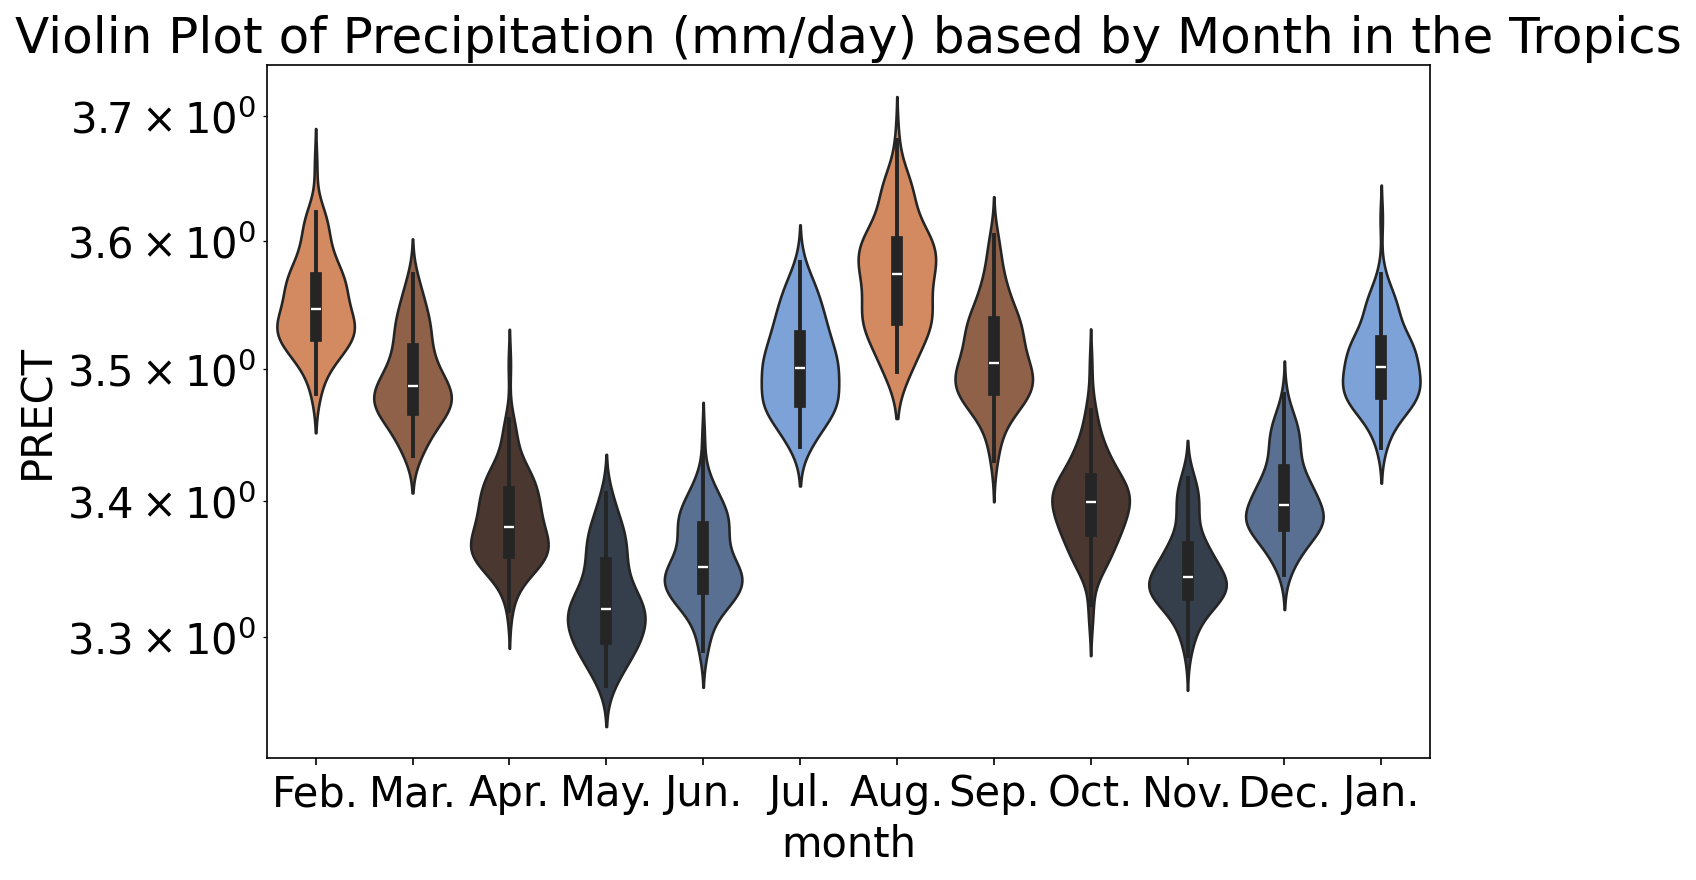

<ipython-input-185-a2181dabd267>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=Wind_All_Ensembles_pd, x='month', y='WSPDSRFAV',


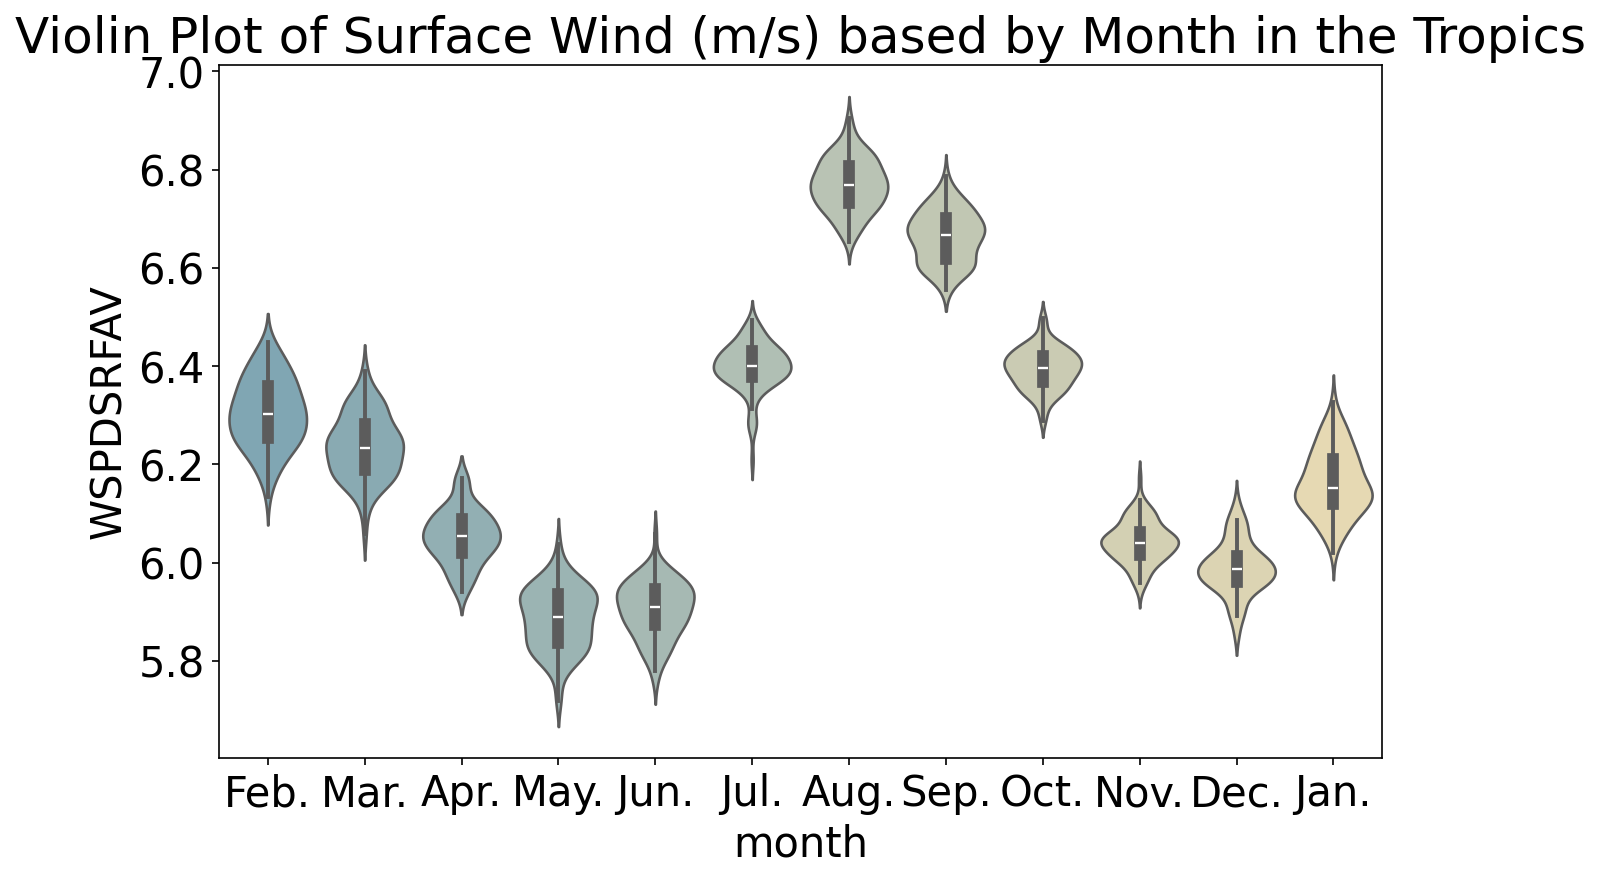

In [ ]:
#Plot the violinplots of precipitation, temp max, and temp min based on each month

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=Temp_All_Ensembles_pd, x='month', y='TS',
            palette=sns.color_palette("flare", n_colors=len(Temp_month_order)))
plt.title('Violin Plot of Temperature (Celsius) based by Month in the Tropics')
plt.show()

fig= plt.figure(figsize=(10, 6))
sns.violinplot(data=Prec_All_Ensembles_pd, x='month', y='PRECT',
            palette=sns.diverging_palette(30, 250, l=65, center="dark"))
fig.get_axes()[0].set_yscale('log')
plt.title('Violin Plot of Precipitation (mm/day) based by Month in the Tropics')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=Wind_All_Ensembles_pd, x='month', y='WSPDSRFAV',
            palette=sns.color_palette("blend:#7AB,#EDA", n_colors=len(Wind_month_order)))
plt.title('Violin Plot of Surface Wind (m/s) based by Month in the Tropics')
plt.show()

For more anlysis of Hypothesis #2, which states there is a higher spread of distibution in the winter months rather than the summer months due to colder temperatures and more rainfall. This is very reflective with the box plot. One assumption was that the temperature maximum tend to have the same spread and almost looks uniform with each other in the boxplot. By using the violin plot, this seems to be accurate the density spread for eahc month is the same. Moreover, the precipitation and temperature min is way more spread and skewed with each other. While the logrimithic analysis is applied on the precipitation, the data still seems to be skewed compared to each month. This helps add to highlight there is more of a density distribution and in March and Novemeber, even though there was a greater spread in the boxplot. One interesting feature is that the temperature min has a wider spread density in the colder and Winter months. This could be due to rain usaually asscoaited with more cloud cover and the cloud cover can block more of the sunlight, which is needed for warming the atmosphere and the Earth. The usage of evaulting the relationship between variables can help infer how they interact with each other, especailly based on the different months.

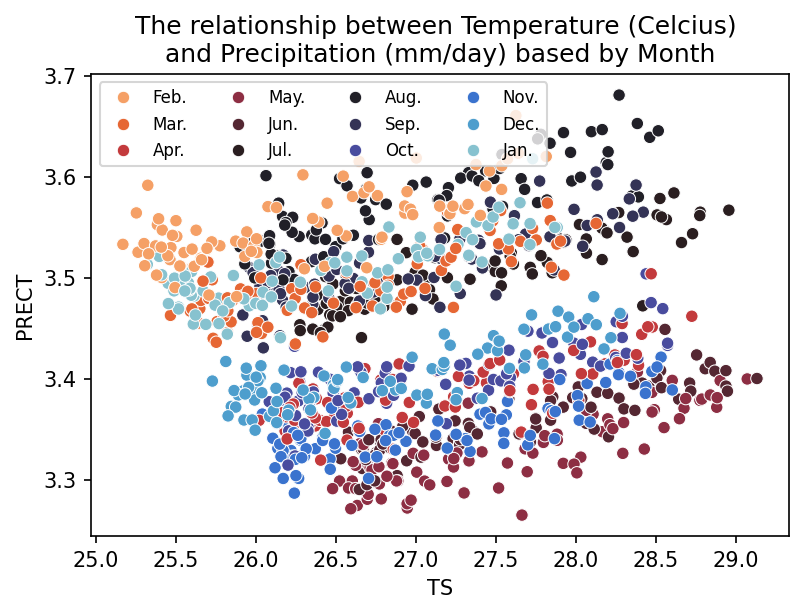

In [ ]:
#Jointhe Temperature and Precipitation together
Weather = pd.concat([Temp_All_Ensembles_pd, Prec_All_Ensembles_pd['PRECT']], axis=1)
#Plot the scatterplot of between temp max and temp min
sns.scatterplot(data= Weather, x ='TS', y = "PRECT", hue ='month',
                palette=sns.color_palette("icefire_r", n_colors=len(Temp_month_order)))
plt.legend(ncols=4, fontsize=8)
plt.title('The relationship between Temperature (Celcius) \nand Precipitation (mm/day) based by Month')
plt.rcParams.update({'font.size': 10})
plt.show()


In [ ]:
Weather

time         TS month     PRECT
0    1970-02-01  25.263899  Feb.  3.525044
1    1970-03-01  25.559294  Mar.  3.507830
2    1970-04-01  26.182764  Apr.  3.348083
3    1970-05-01  26.602604  May.  3.298525
4    1970-06-01  26.665533  Jun.  3.310894
...         ...        ...   ...       ...
1015 2064-09-01  28.354937  Sep.  3.560733
1016 2064-10-01  28.542416  Oct.  3.469212
1017 2064-11-01  28.506838  Nov.  3.411410
1018 2064-12-01  28.218351  Dec.  3.440399
1019 2065-01-01  27.868237  Jan.  3.549563

[1020 rows x 4 columns]

Hypothesis #3 states there is a positive realtionship between temperature max and min with winter months have lower temperatures for both but summer months having higher temperatures. This hypothesis was correct because warmer temprature max tends to have warmer temperature min. Furthermore, the scatterplot shows that the winter months tend to have lower temperature max and min than the summer months. This overall infers that the temperature gradient in the day in each respective month is not usually the same. There would be more of a uncorrelated line in tropical locations because they tend to be warm all year long. Also, tropical locations tend to be more humid, which results in maintaining the warm temperature in the night, which greatly influences of the temperature min. Temperature mins tend to be measured more at night because it usually cooler in the night than the daytime. Overall, a postive relationship can be identified from the scatterplot. Additonally, next step usage would be to apply linear regression techniques as well as statitical significance test of the correlation through a Pearson correlation analysis.

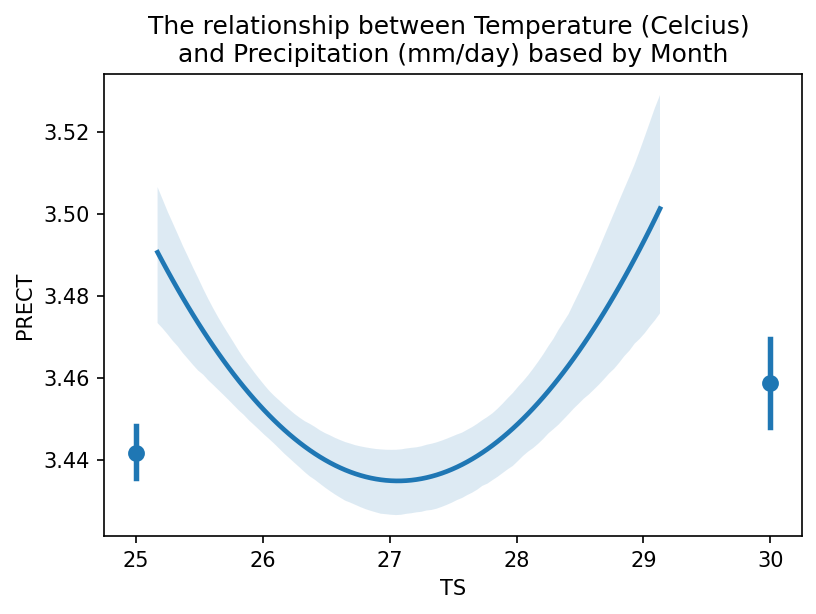

In [ ]:
#Plot the scatterplot of between temp max and temp min
sns.regplot(data= Weather, x ='TS', y = "PRECT", x_bins=np.arange(0, 100, 5), order=2)
plt.title('The relationship between Temperature (Celcius) \nand Precipitation (mm/day) based by Month')
plt.rcParams.update({'font.size': 10})
plt.show()

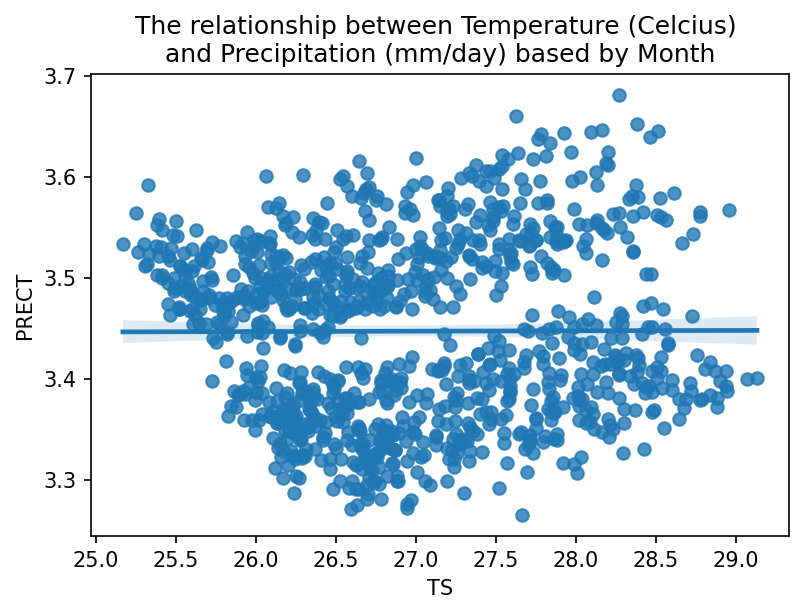

In [ ]:
#Plot the scatterplot of between temp max and temp min
sns.regplot(data= Weather, x ='TS', y = "PRECT")
plt.title('The relationship between Temperature (Celcius) \nand Precipitation (mm/day) based by Month')
plt.rcParams.update({'font.size': 10})
plt.show()

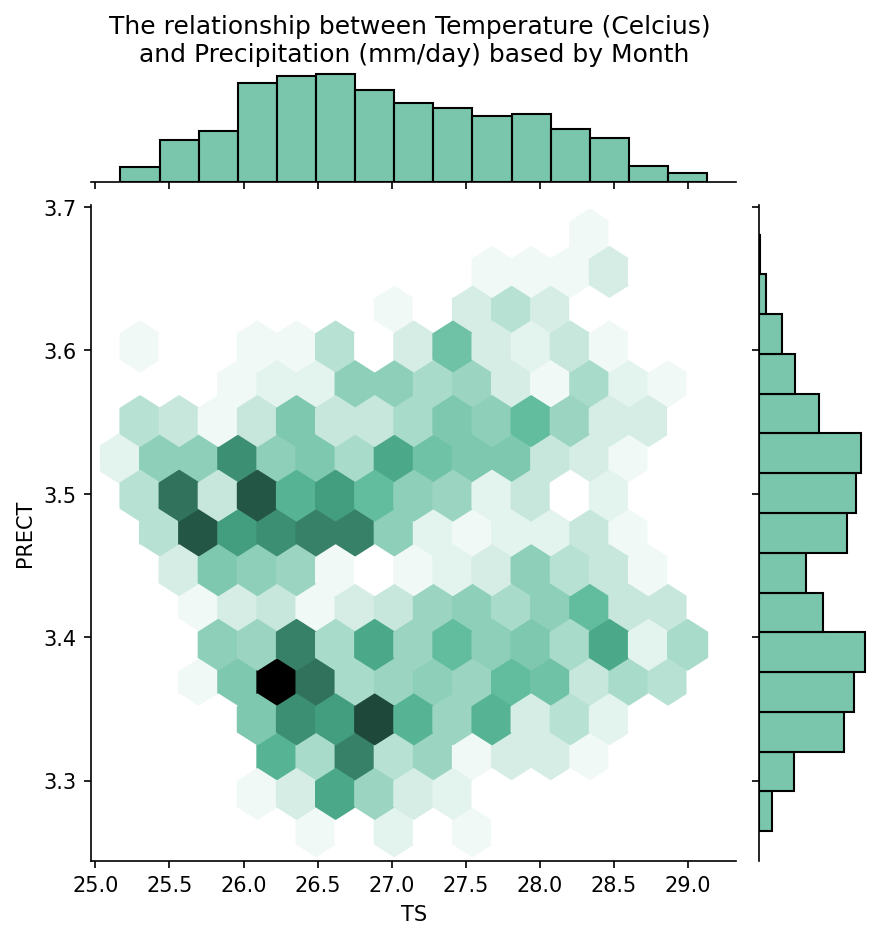

In [ ]:
sns.jointplot(data= Weather, x ='TS', y = "PRECT", kind="hex", color="#4CB391")
plt.title('The relationship between Temperature (Celcius) \nand Precipitation (mm/day) based by Month', y=1.2)
plt.rcParams.update({'font.size': 10})
plt.show()

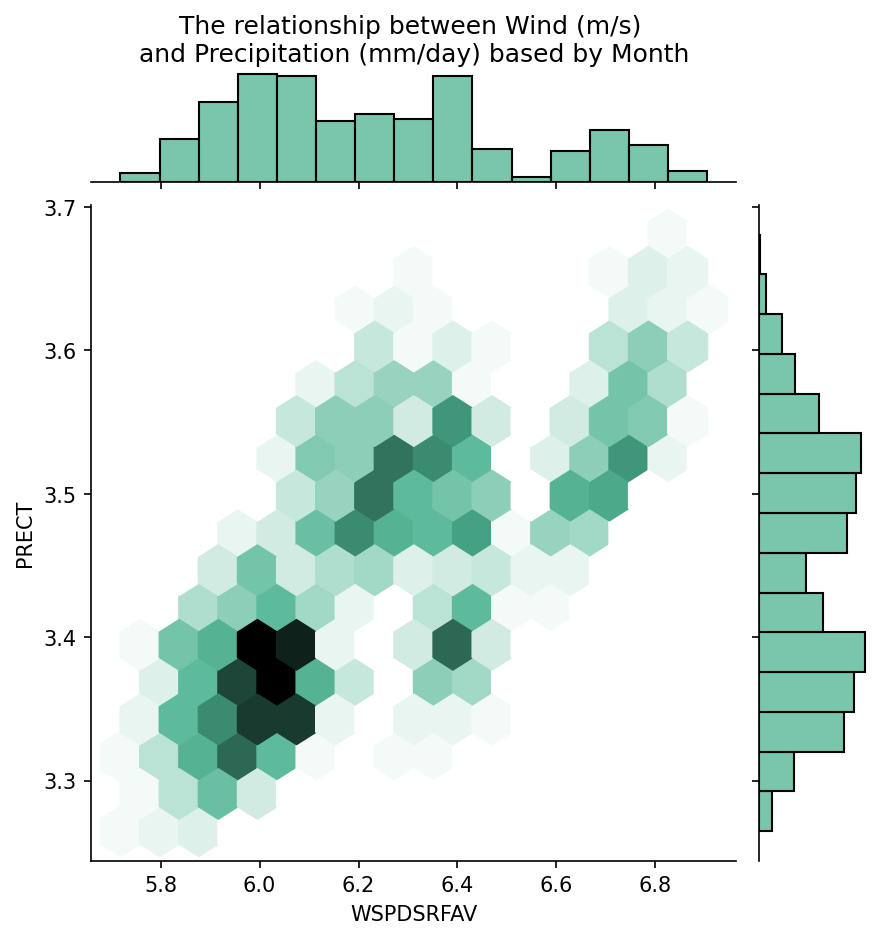

In [ ]:

Weather_2 = pd.concat([Wind_All_Ensembles_pd, Prec_All_Ensembles_pd['PRECT']], axis=1)
sns.jointplot(data= Weather_2, x ='WSPDSRFAV', y = "PRECT", kind="hex", color="#4CB391")
plt.title('The relationship between Wind (m/s) \nand Precipitation (mm/day) based by Month', y=1.2)
plt.rcParams.update({'font.size': 10})
plt.show()

In [ ]:
Prec_All_Ensembles_pd

time     PRECT
0    1970-02-01  3.525044
1    1970-03-01  3.507830
2    1970-04-01  3.348083
3    1970-05-01  3.298525
4    1970-06-01  3.310894
...         ...       ...
1015 2064-09-01  3.560733
1016 2064-10-01  3.469212
1017 2064-11-01  3.411410
1018 2064-12-01  3.440399
1019 2065-01-01  3.549563

[1020 rows x 2 columns]

(-1.0999999999852772,
 1.0999999997982863,
 -1.0999999950964359,
 1.0999999997664969)

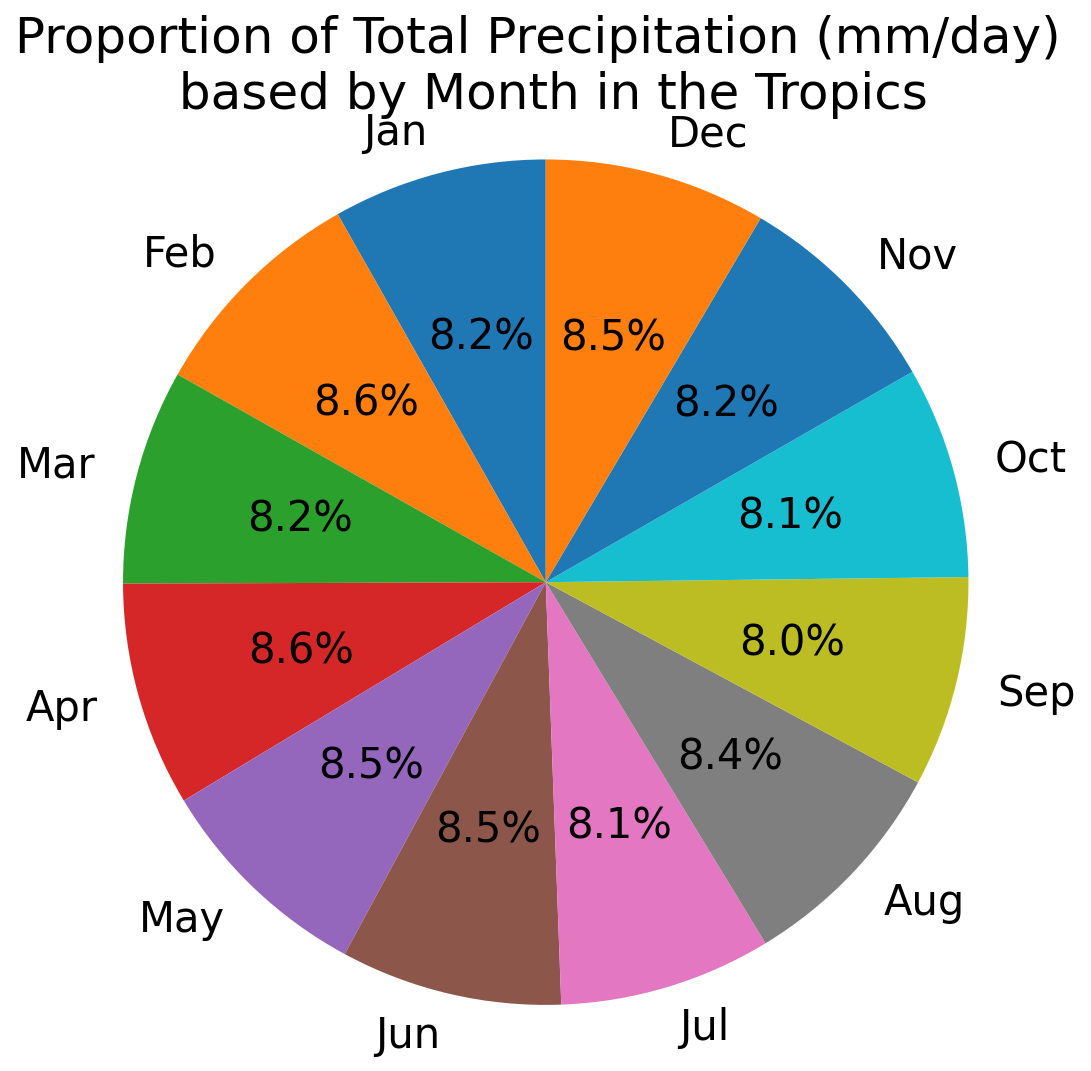

In [ ]:
# Aggregate data by month
monthly_prec = Prec_All_Ensembles_pd.groupby('month')['PRECT'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate percentage of total for each month
total_prec = monthly_prec.sum()
pert_prec = (monthly_prec / total_prec) * 100

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(pert_prec, labels=months, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Precipitation (mm/day) \n based by Month in the Tropics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [ ]:
# # Aggregate data by month
# monthly_temp = Temp_All_Ensembles_pd.groupby('month')['TS'].sum()
# monthly_prec = Prec_All_Ensembles_pd.groupby('month')['PRECT'].sum()
# monthly_wind = Wind_All_Ensembles_pd.groupby('month')['WSPDSRFAV'].sum()


# # Calculate percentage of total for each month
# total_temp = monthly_temp.sum()
# pert_temp = (monthly_temp / total_temp) * 100
# total_prec = monthly_prec.sum()
# pert_prec = (monthly_prec / total_prec) * 100
# total_wind = monthly_wind.sum()
# pert_wind = (monthly_wind / total_wind) * 100


# # Plot pie chart for each month
# plt.figure(figsize=(15, 8))
# for i, (month, precip) in enumerate(monthly_prec.items(), start=1):
#     plt.subplot(3, 4, i)  # Adjust subplot grid as needed
#     plt.pie([precip, total_prec - precip], labels=['PRECT', 'Other'], autopct='%1.1f%%', startangle=140)
# plt.title('Pie Chart of Temperature (Celsius) \n based by Month in the Tropics')



# # Create the violin plot
# plt.figure(figsize=(10, 6))
# colors = sns.color_palette("husl")
# plt.pie(pert_temp, labels=pert_temp.index, colors = colors, autopct='%1.1f')
# plt.title('Pie Chart of Temperature (Celsius) \n based by Month in the Tropics')
# plt.show()

# fig= plt.figure(figsize=(10, 6))
# colors = sns.color_palette("husl")
# plt.pie(pert_prec, labels=pert_prec.index, colors = colors, autopct='%1.1f')
# plt.title('Pie Chart of Precipitation (mm/day) \n based by Month in the Tropics')
# plt.show()

# plt.figure(figsize=(10, 6))
# colors = sns.color_palette("husl")
# plt.pie(pert_wind, labels=pert_wind.index, colors = colors, autopct='%1.1f')
# plt.title('Pie Chart of Surface Wind (m/s) \n based by Month in the Tropics')
# plt.show()


# # Aggregate precipitation data by month
# # monthly_precipitation = df.groupby('month')['PRECT'].sum()

# # Calculate total precipitation
# total_precipitation = monthly_precipitation.sum()

# # Plot pie chart for each month
# plt.figure(figsize=(15, 8))
# for i, (month, precip) in enumerate(monthly_precipitation.items(), start=1):
#     plt.subplot(3, 4, i)  # Adjust subplot grid as needed
#     plt.pie([precip, total_precipitation - precip], labels=['PRECT', 'Other'], autopct='%1.1f%%', startangle=140)


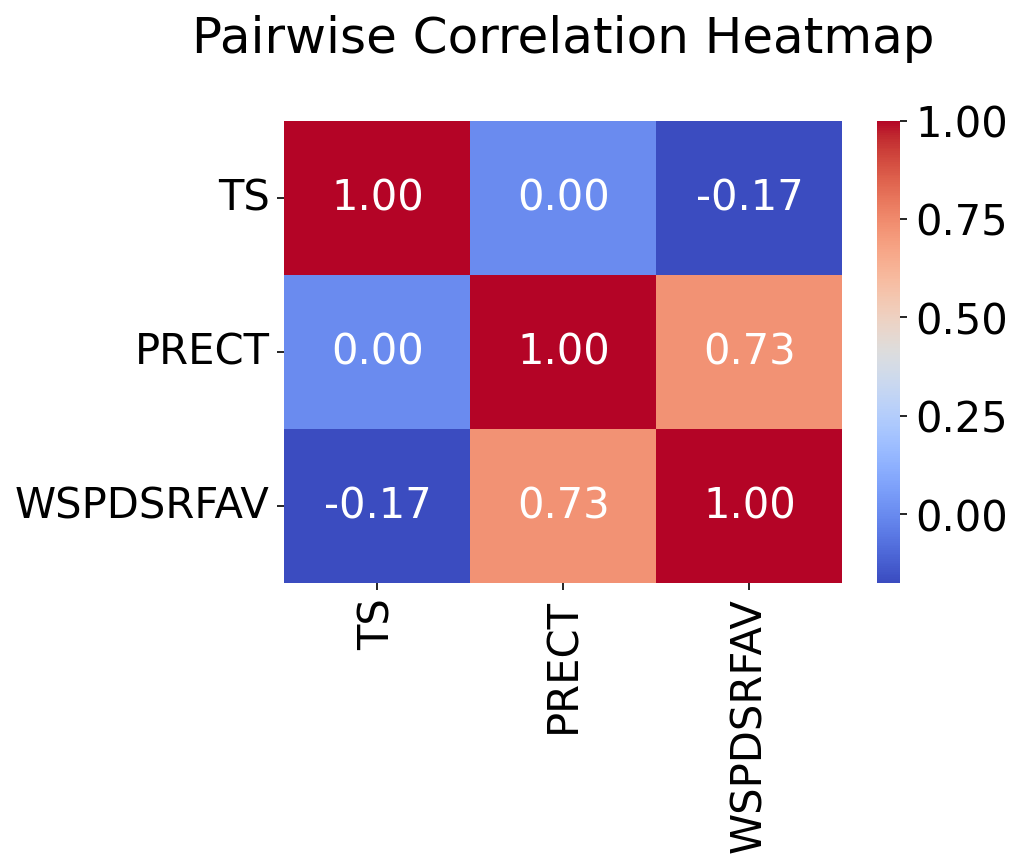

In [ ]:
# Pairwise Correlation Heatmap
Weather = pd.concat([Temp_All_Ensembles_pd, Prec_All_Ensembles_pd['PRECT']], axis=1)
Weather = pd.concat([Weather, Wind_All_Ensembles_pd['WSPDSRFAV']], axis=1)
Weather


correlation_matrix = Weather[['TS', 'PRECT', 'WSPDSRFAV']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap\n')
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
Weather

time         TS month     PRECT  WSPDSRFAV
0    1970-02-01  25.263899  Feb.  3.525044   6.380497
1    1970-03-01  25.559294  Mar.  3.507830   6.390141
2    1970-04-01  26.182764  Apr.  3.348083   6.039737
3    1970-05-01  26.602604  May.  3.298525   5.948481
4    1970-06-01  26.665533  Jun.  3.310894   5.930880
...         ...        ...   ...       ...        ...
1015 2064-09-01  28.354937  Sep.  3.560733   6.687996
1016 2064-10-01  28.542416  Oct.  3.469212   6.443380
1017 2064-11-01  28.506838  Nov.  3.411410   6.004041
1018 2064-12-01  28.218351  Dec.  3.440399   5.898508
1019 2065-01-01  27.868237  Jan.  3.549563   6.145408

[1020 rows x 5 columns]

# __________________

### Visualization of the Data

In [ ]:
def add_cartopy_params(ax):

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
    # These make the labels formatted as latitude/longitude
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    # Clean up
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180,60))
    gl.ylocator = mticker.FixedLocator(np.arange(-60.,60.,20))
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    ax.set_xlabel('Longitude', fontsize=25)
    ax.set_ylabel('Latitude', fontsize=25)

    ax.coastlines('50m', linewidth=0.75)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

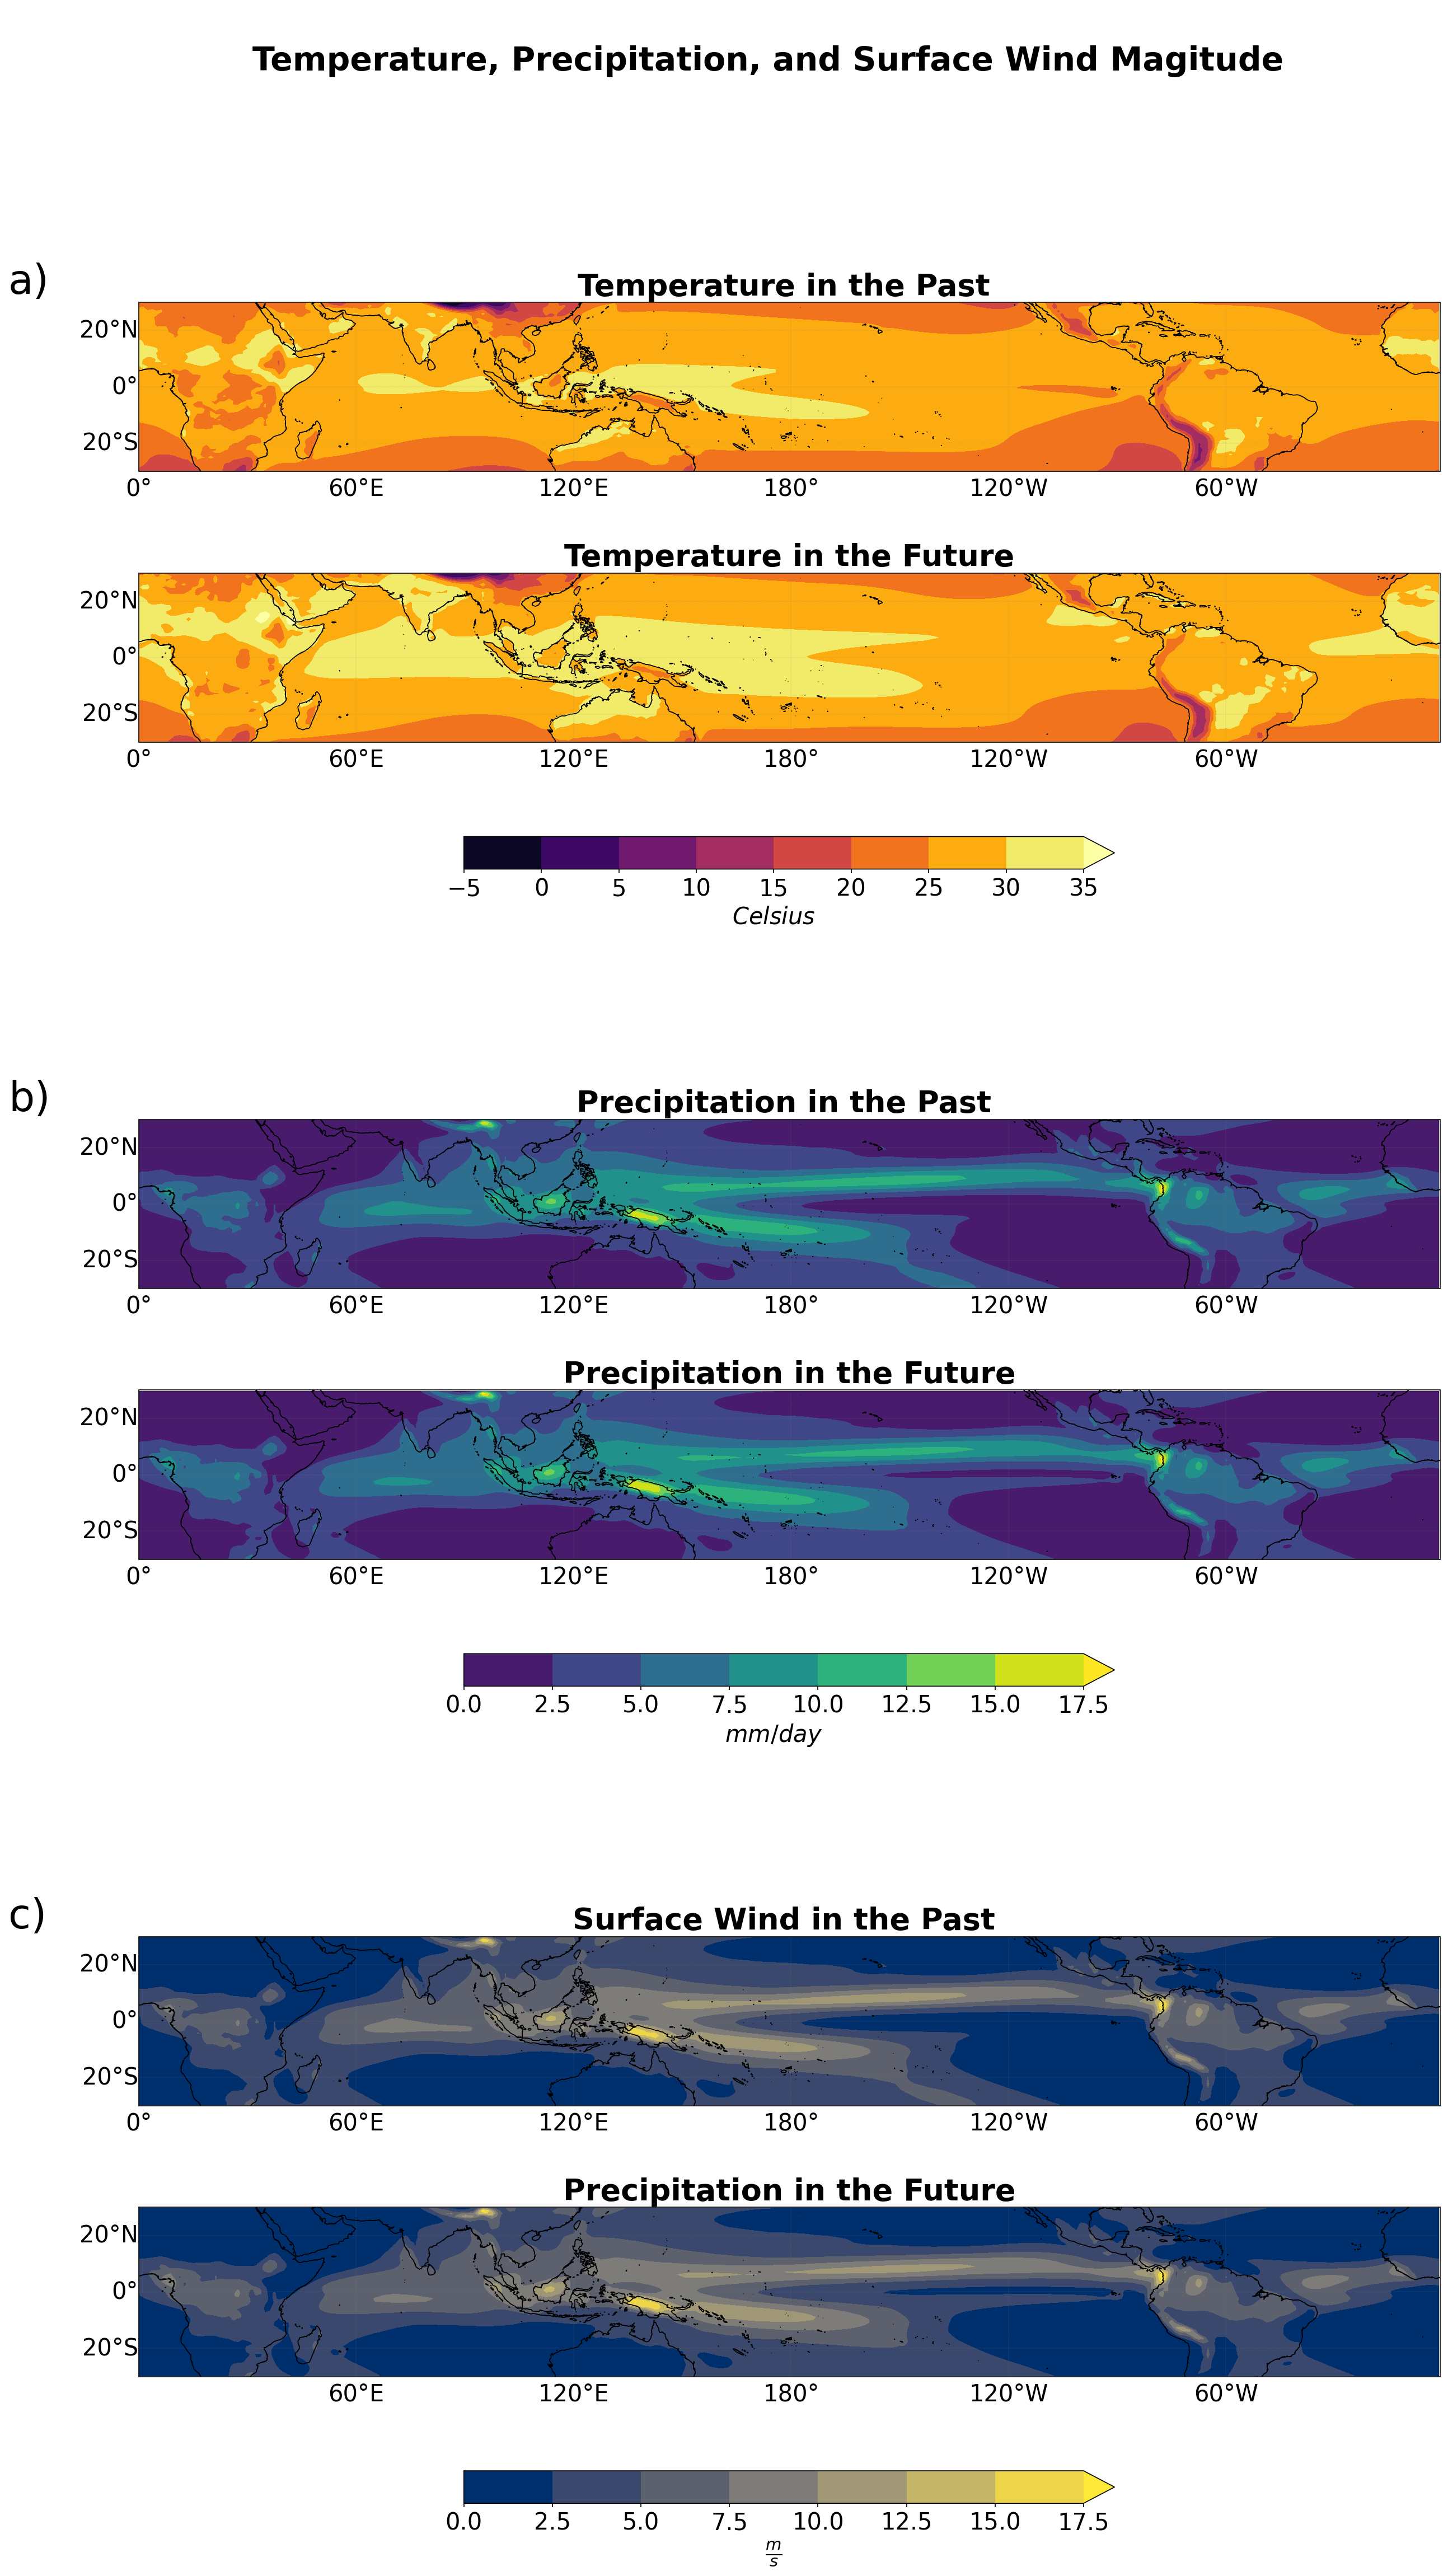

In [ ]:
#Seaosnal Cycle Removed of OLR, U850, and Precip of the Past

plotproj = ccrs.PlateCarree(central_longitude=180)
#norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=1.0)


fig = plt.figure(figsize=(20.,35.),facecolor='white')
# plt.style.use('default')
plt.suptitle('\nTemperature, Precipitation, and Surface Wind Magitude',fontweight="bold",fontsize=28)#,y=3.35

gs = fig.add_gridspec(3, 1, hspace=0.3)

gs0 = gs[0].subgridspec(2, 1, wspace=0.1, hspace=0.6)
gs1 = gs[1].subgridspec(2, 1, wspace=0.1, hspace=0.6)
gs2 = gs[2].subgridspec(2, 1, wspace=0.1, hspace=0.6)


ax1 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax1)
ax1.set_extent([-180, 179, -30., 30.],plotproj)
# clevs1 = np.arange(-0.3,0.3,0.01)
cs1 = ax1.contourf(Temp_All_Ensembles.lon,Temp_All_Ensembles.lat,
                   Temp_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble", "time"], skipna = True),
                   extend='max',cmap='inferno', transform=ccrs.PlateCarree())
plt.title('Temperature in the Past ',fontweight="bold",fontsize=26)
ax1.text(-0.1, 1.0, 'a)', transform=ax1.transAxes , fontsize=35, va='bottom')



ax3 = fig.add_subplot(gs0[1, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-180, 179, -30., 30.],plotproj)
# clevs3 = np.arange(-0.3,0.3,0.01)
cs3 = ax3.contourf(Temp_All_Ensembles.lon,Temp_All_Ensembles.lat,
                   Temp_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))].mean(["Ensemble", "time"],skipna = True),
                   extend='max',cmap='inferno', transform=ccrs.PlateCarree())
plt.title('Temperature in the Future',fontweight="bold",fontsize=26)


ax1.set_aspect("auto")
ax3.set_aspect("auto")



cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax1, ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################


ax5 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax5)
ax5.set_extent([-180, 179, -30., 30.],plotproj)
# clevs5 = np.arange(-0.3,0.3,0.01)
cs1 = ax5.contourf(Prec_All_Ensembles.lon,Prec_All_Ensembles.lat,
                   Prec_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble", "time"],skipna = True),
                   extend='max',cmap='viridis', transform=ccrs.PlateCarree())
plt.title('Precipitation in the Past ',fontweight="bold",fontsize=26)
ax5.text(-0.1, 1.0, 'b)', transform=ax5.transAxes , fontsize=35, va='bottom')



ax7 = fig.add_subplot(gs1[1, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-180, 179, -30., 30.],plotproj)
# clevs7 = np.arange(-0.3,0.3,0.01)
cs7 = ax7.contourf(Prec_All_Ensembles.lon,Prec_All_Ensembles.lat,
                   Prec_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))].mean(["Ensemble", "time"],skipna = True),
                   extend='max',cmap='viridis', transform=ccrs.PlateCarree())
plt.title('Precipitation in the Future',fontweight="bold",fontsize=26)


ax5.set_aspect("auto")
ax7.set_aspect("auto")



cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax5, ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$mm/day$')



#######################################################################################################################################################################################################################################################


ax9 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax9)
ax9.set_extent([-180, 179, -30., 30.],plotproj)
# clevs9 = np.arange(-0.3,0.3,0.01)
cs9 = ax9.contourf(Prec_All_Ensembles.lon,Prec_All_Ensembles.lat,
                   Prec_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble", "time"],skipna = True),
                   extend='max',cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Surface Wind in the Past ',fontweight="bold",fontsize=26)
ax9.text(-0.1, 1.0, 'c)', transform=ax9.transAxes , fontsize=35, va='bottom')



ax11 = fig.add_subplot(gs2[1, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-180, 179, -30., 30.],plotproj)
# clevs11 = np.arange(-0.3,0.3,0.01)
cs11 = ax11.contourf(Prec_All_Ensembles.lon,Prec_All_Ensembles.lat,
                   Prec_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))].mean(["Ensemble", "time"],skipna = True),
                   extend='max',cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Precipitation in the Future',fontweight="bold",fontsize=26)


ax9.set_aspect("auto")
ax11.set_aspect("auto")


cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax9, ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label=r'$\frac{m}{s}$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()


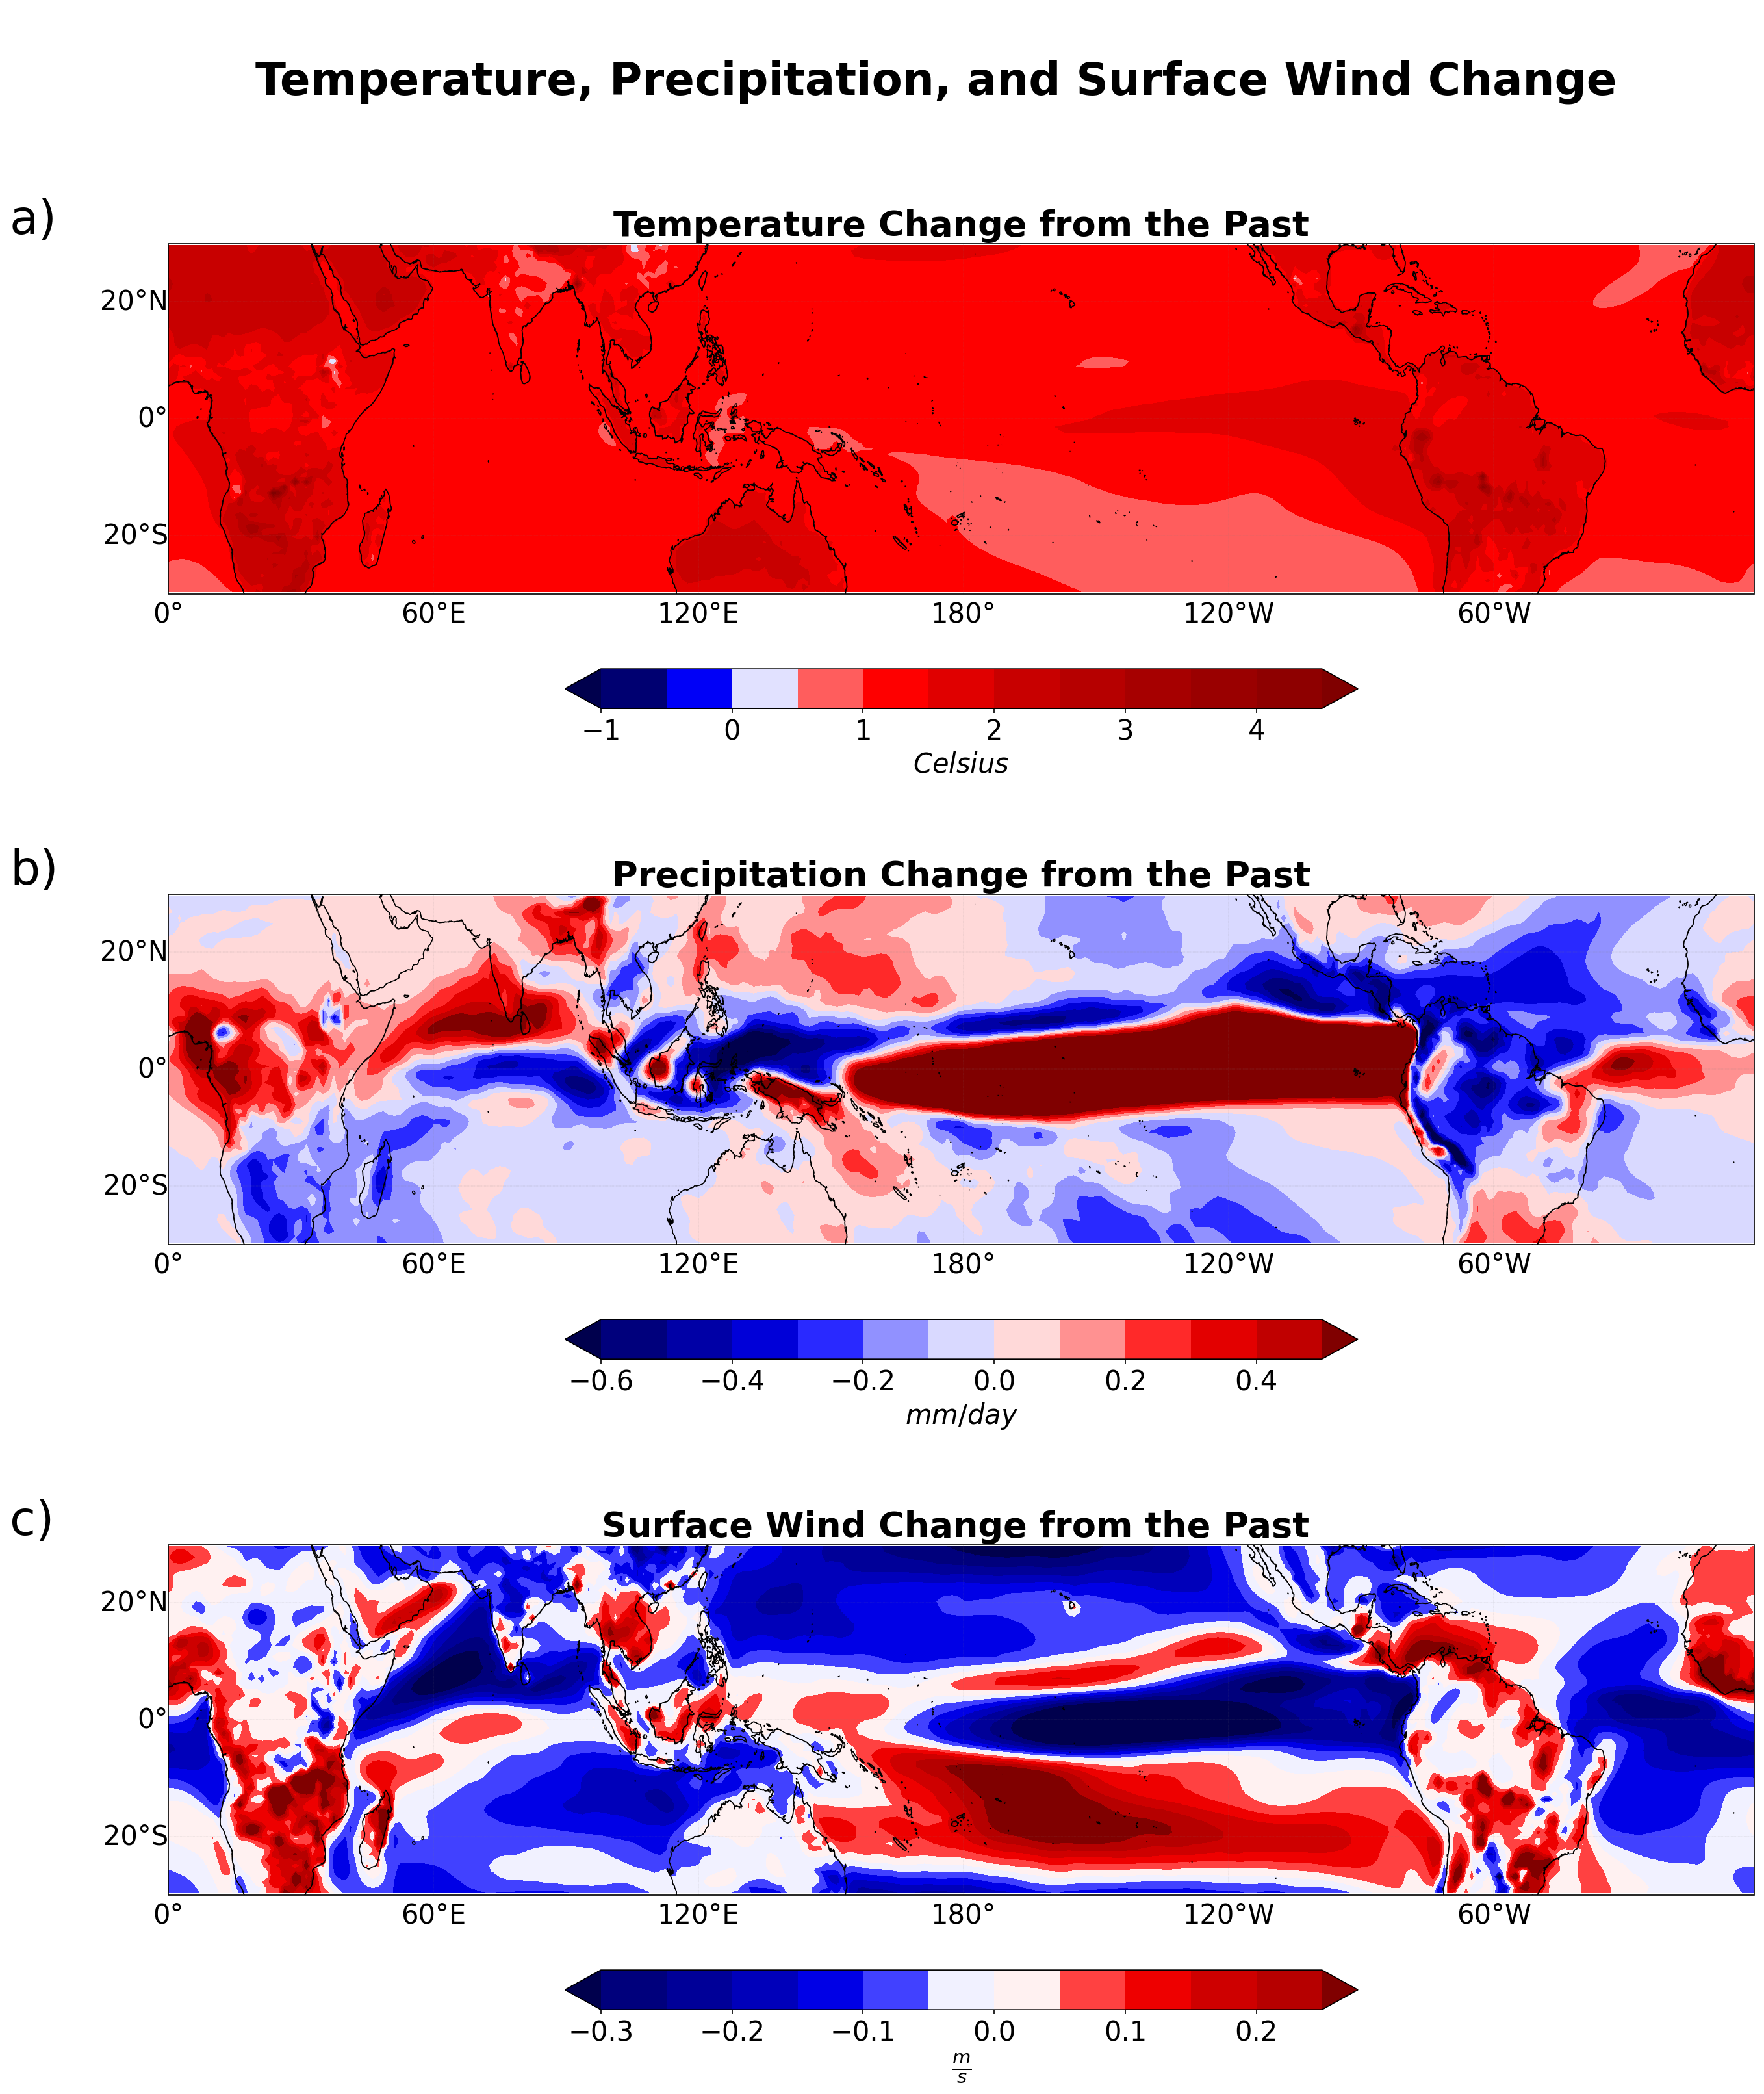

In [ ]:
#Seaosnal Cycle Removed of OLR, U850, and Precip of the Past

plotproj = ccrs.PlateCarree(central_longitude=180)
#norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-1.0, vmax=1.0)


fig = plt.figure(figsize=(21.,24.),facecolor='white')
# plt.style.use('default')
plt.suptitle('\nTemperature, Precipitation, and Surface Wind Change',fontweight="bold",fontsize=33)#,y=3.35

gs = fig.add_gridspec(3, 1, hspace=0.3)

gs0 = gs[0].subgridspec(1, 1, wspace=0.1)
gs1 = gs[1].subgridspec(1, 1, wspace=0.1)
gs2 = gs[2].subgridspec(1, 1, wspace=0.1)





ax3 = fig.add_subplot(gs0[0, 0],projection=plotproj)
add_cartopy_params(ax3)
ax3.set_extent([-180, 179, -30., 30.],plotproj)
clevs3 = np.arange(-1,5,0.5)
cs3 = ax3.contourf(Temp_All_Ensembles.lon,Temp_All_Ensembles.lat,
                   (Temp_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))]-Temp_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble","time"], skipna = True)).mean(["Ensemble","time"],skipna = True),
                   clevs3, norm=SymLogNorm(linthresh=0.5, linscale=0.5, vmin=-1, vmax=5), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('Temperature Change from the Past',fontweight="bold",fontsize=26)
ax3.text(-0.1, 1.0, 'a)', transform=ax3.transAxes , fontsize=35, va='bottom')


# ax1.set_aspect("auto")
ax3.set_aspect("auto")



cbar_axs0 = fig.colorbar(cs3,
                          ax=[ax3],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label='$Celsius$')



#######################################################################################################################################################################################################################################################





ax7 = fig.add_subplot(gs1[0, 0],projection=plotproj)
add_cartopy_params(ax7)
ax7.set_extent([-180, 179, -30., 30.],plotproj)
clevs7 = np.arange(-0.6,0.6,0.1)
cs7 = ax7.contourf(Prec_All_Ensembles.lon,Prec_All_Ensembles.lat,
                   (Prec_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))]-Prec_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble","time"], skipna = True)).mean(["Ensemble","time"],skipna = True),
                   clevs7, norm=SymLogNorm(linthresh=0.2, linscale=0.2, vmin=-0.7, vmax=0.7), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('Precipitation Change from the Past',fontweight="bold",fontsize=26)
ax7.text(-0.1, 1.0, 'b)', transform=ax7.transAxes , fontsize=35, va='bottom')


# ax5.set_aspect("auto")
ax7.set_aspect("auto")



cbar_axs1 = fig.colorbar(cs7,
                          ax=[ax7],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0, 4.3),
                          label='$mm/day$')



#######################################################################################################################################################################################################################################################





ax11 = fig.add_subplot(gs2[0, 0],projection=plotproj)
add_cartopy_params(ax11)
ax11.set_extent([-180, 179, -30., 30.],plotproj)
clevs11 = np.arange(-0.3,0.3,0.05)
cs11 = ax11.contourf(Wind_All_Ensembles.lon,Wind_All_Ensembles.lat,
                   (Wind_All_Ensembles.loc[dict(time=slice('2025-01','2060-01'))]-Wind_All_Ensembles.loc[dict(time=slice('1970-01','2010-01'))].mean(["Ensemble","time"], skipna = True)).mean(["Ensemble","time"],skipna = True),
                   clevs11, norm=SymLogNorm(linthresh=0.03, linscale=0.03, vmin=-0.4, vmax=0.4), extend='both',cmap='seismic', transform=ccrs.PlateCarree())
plt.title('Surface Wind Change from the Past ',fontweight="bold",fontsize=26)
ax11.text(-0.1, 1.0, 'c)', transform=ax11.transAxes , fontsize=35, va='bottom')


# ax9.set_aspect("auto")
ax11.set_aspect("auto")


cbar_axs2 = fig.colorbar(cs11,
                          ax=[ax11],
#                           use_gridspec = True,
                          orientation='horizontal',
                          extend='both',
#                           aspect=65,
                          shrink=0.5,
#                           pad=0.9,
#                           anchor=(0.5, 1.3),
                          label=r'$\frac{m}{s}$')

plt.rcParams.update({'font.size': 20})
plt.show()
plt.close()


<ipython-input-33-a600760181b9>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1= plt.subplot(311)


Text(0, 0.5, '$m/s$')

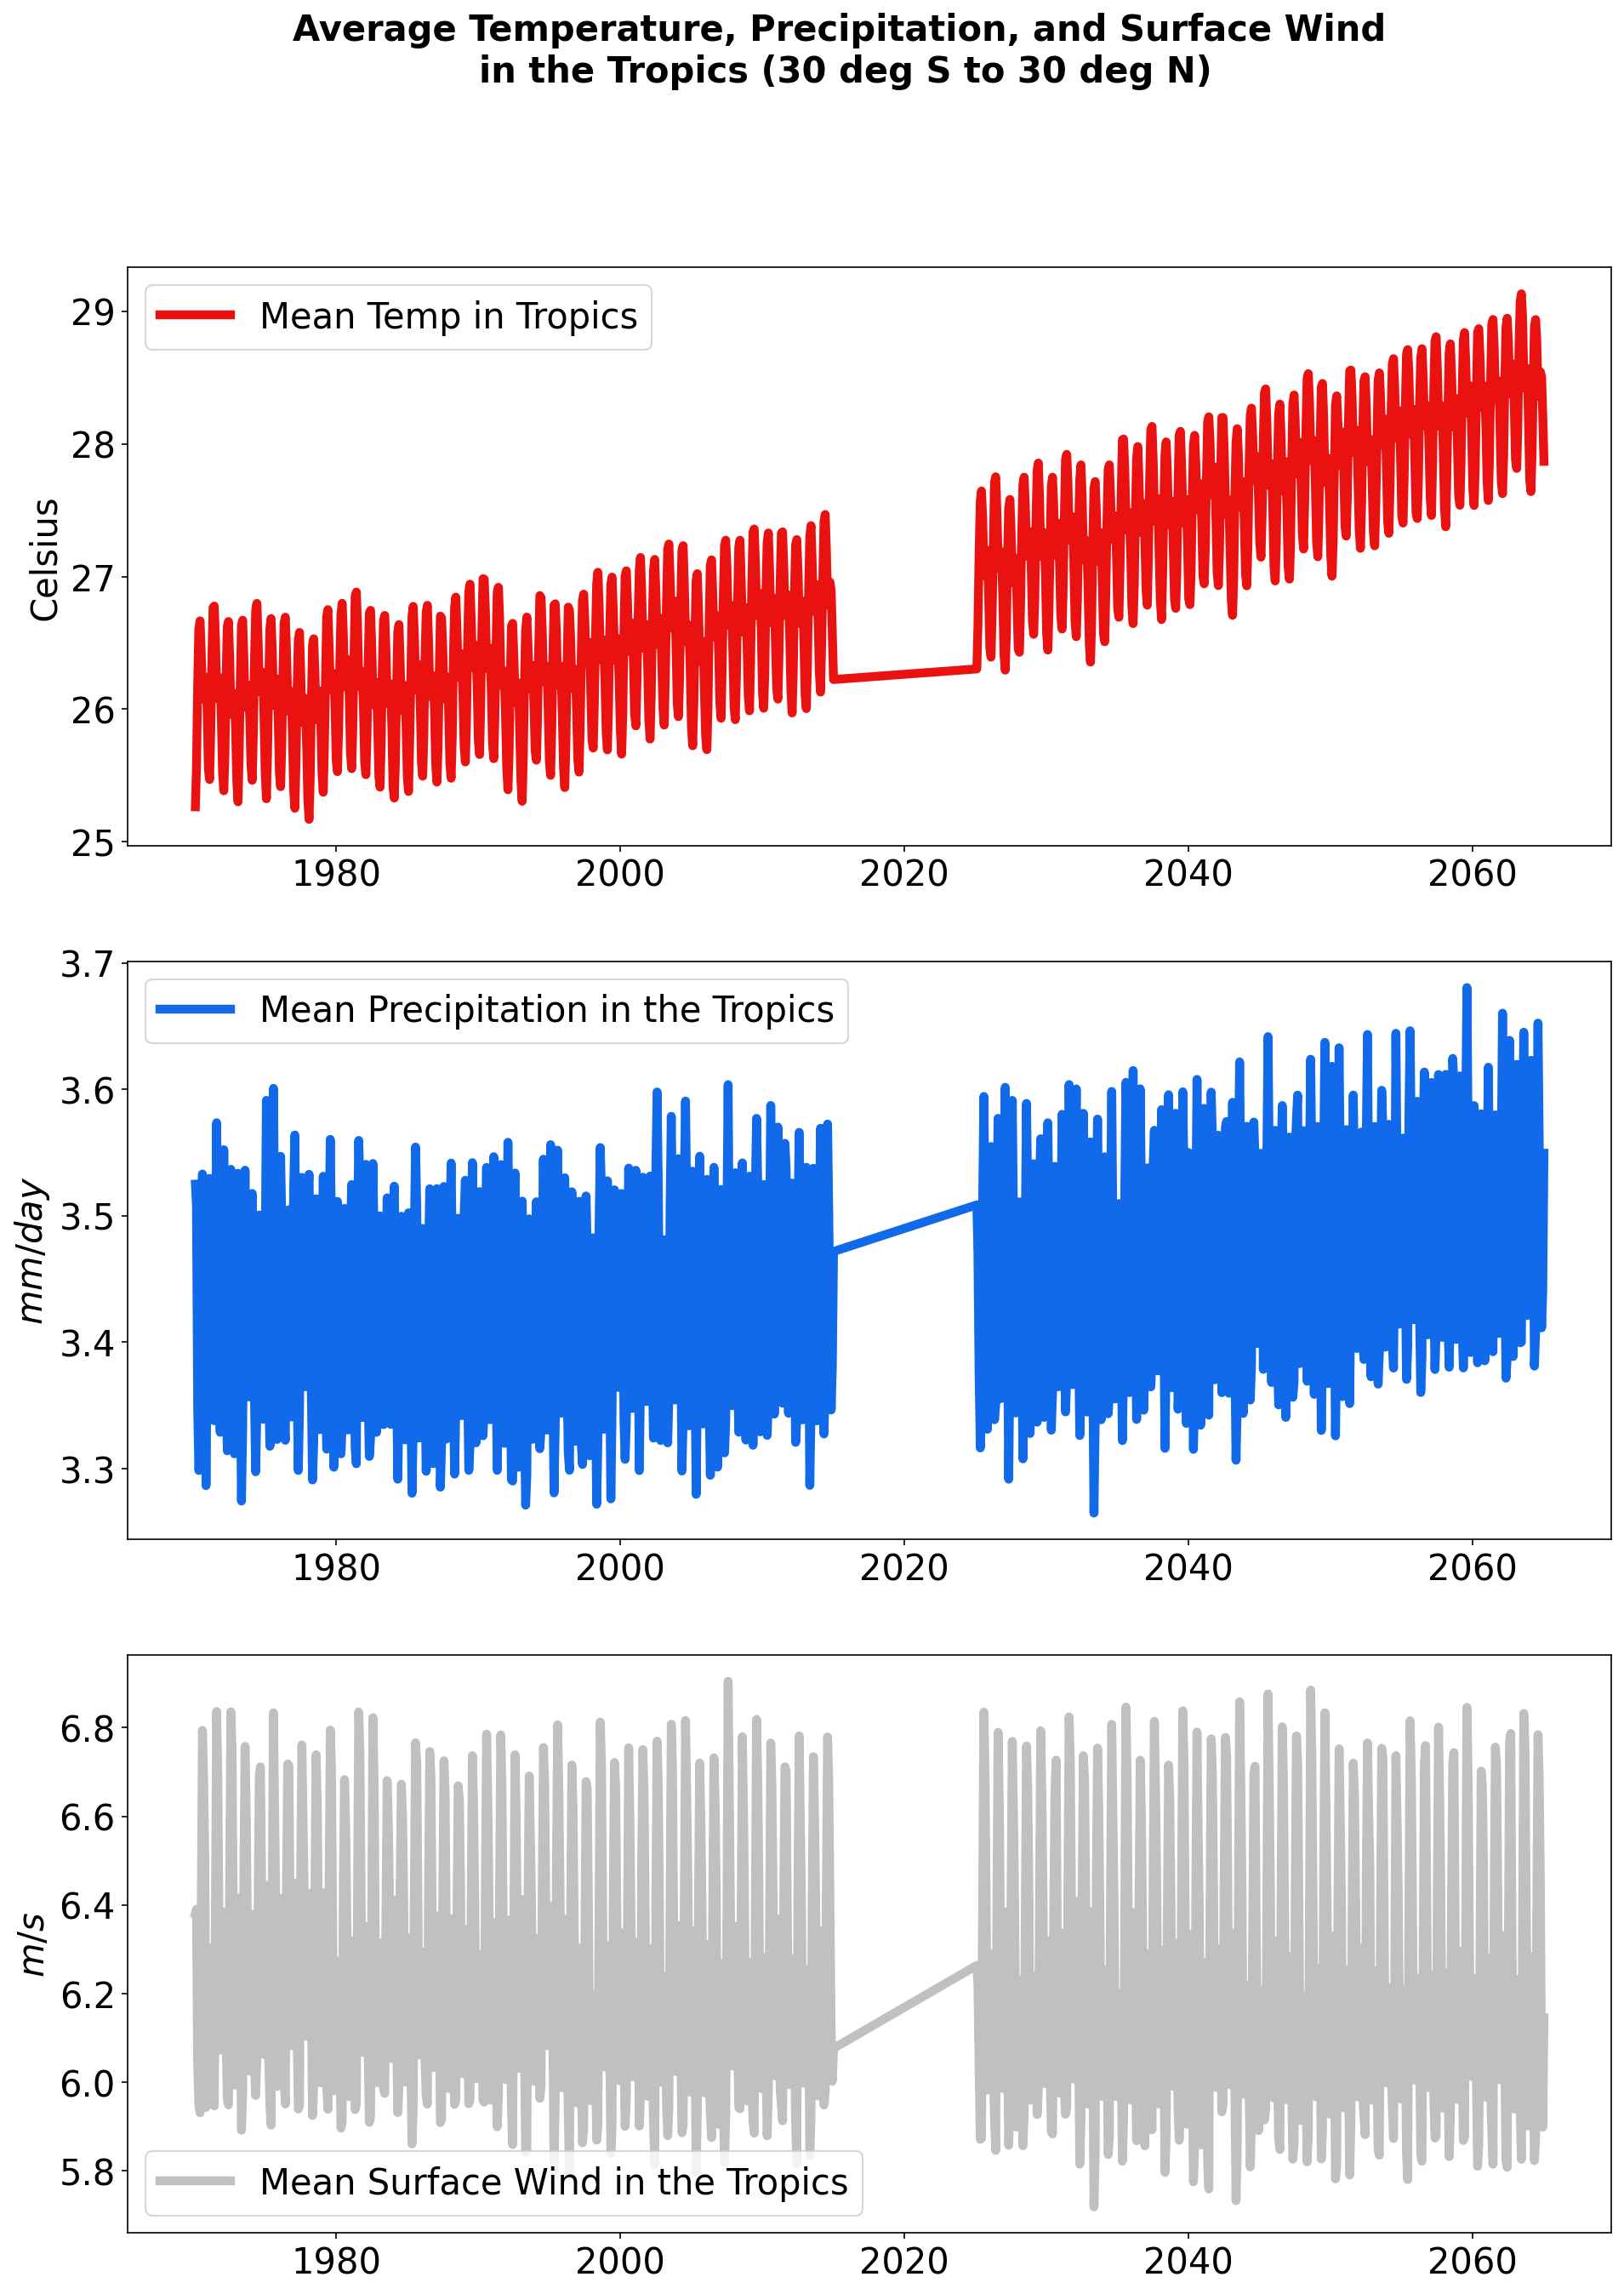

In [ ]:
fig, axs = plt.subplot_mosaic([['a)', 'b)', 'c)']],figsize=(15. , 20.),facecolor='white')
plt.suptitle('Average Temperature, Precipitation, and Surface Wind \nin the Tropics (30 deg S to 30 deg N)',fontweight="bold",fontsize=20)
ax1= plt.subplot(311)
ax1.plot(Temp_All_Ensembles.time, Temp_All_Ensembles.mean(["Ensemble","lat","lon"],skipna = True), color='#EA1111', linewidth=5, label='Mean Temp in Tropics')
plt.legend()
plt.ylabel("Celsius")
ax2= plt.subplot(312)
ax2.plot(Prec_All_Ensembles.time, Prec_All_Ensembles.mean(["Ensemble","lat","lon"],skipna = True), color='#116AEA', linewidth=5, label='Mean Precipitation in the Tropics')
plt.legend()
plt.ylabel("$mm/day$")
ax3= plt.subplot(313)
ax3.plot(Wind_All_Ensembles.time, Wind_All_Ensembles.mean(["Ensemble","lat","lon"],skipna = True), color='#C0C0C0', linewidth=5, label='Mean Surface Wind in the Tropics')
plt.legend()
plt.ylabel('$m/s$')

